### **Import Library**

In [ ]:
!pip install openml

In [1]:
import openml

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from scipy.stats import spearmanr
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

### **Load Dataset**

In [2]:
# Fetching the list of all available datasets on OpenML
d = openml.datasets.list_datasets(output_format='dataframe')
print(d.shape)

# Listing column names or attributes that OpenML offers
for name in d.columns:
    print(name)

(5883, 16)
did
name
version
uploader
status
format
MajorityClassSize
MaxNominalAttDistinctValues
MinorityClassSize
NumberOfClasses
NumberOfFeatures
NumberOfInstances
NumberOfInstancesWithMissingValues
NumberOfMissingValues
NumberOfNumericFeatures
NumberOfSymbolicFeatures


In [3]:
print(d.head())

   did        name  version uploader  status format  MajorityClassSize  \
2    2      anneal        1        1  active   ARFF              684.0   
3    3    kr-vs-kp        1        1  active   ARFF             1669.0   
4    4       labor        1        1  active   ARFF               37.0   
5    5  arrhythmia        1        1  active   ARFF              245.0   
6    6      letter        1        1  active   ARFF              813.0   

   MaxNominalAttDistinctValues  MinorityClassSize  NumberOfClasses  \
2                          7.0                8.0              5.0   
3                          3.0             1527.0              2.0   
4                          3.0               20.0              2.0   
5                         13.0                2.0             13.0   
6                         26.0              734.0             26.0   

   NumberOfFeatures  NumberOfInstances  NumberOfInstancesWithMissingValues  \
2              39.0              898.0                  

In [4]:
# Filtering dataset list to have 'students' in the 'name' column
# then sorting the list based on the 'version'
d[d['name'].str.contains('Students')].sort_values(by='version').head()

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
41199,41199,Students,1,5696,active,ARFF,NaN,NaN,NaN,NaN,33.0,5820.0,0.0,0.0,33.0,0.0
43408,43408,Video-Game-Use-in-US-High-School-Students,1,30123,active,arff,NaN,NaN,NaN,NaN,24.0,2202.0,2202.0,24084.0,15.0,0.0
43415,43415,Students-Academic-Performance-Dataset,1,30123,active,arff,NaN,NaN,NaN,NaN,17.0,480.0,0.0,0.0,4.0,0.0
43719,43719,Math-Students,1,30123,active,arff,NaN,NaN,NaN,NaN,33.0,395.0,0.0,0.0,16.0,0.0
45748,45748,StudentsPerformance,2,40508,active,arff,518.0,NaN,482.0,2.0,8.0,1000.0,0.0,0.0,3.0,0.0


In [5]:
students = openml.datasets.get_dataset(43415)
students

OpenML Dataset
Name.........: Students-Academic-Performance-Dataset
Version......: 1
Format.......: arff
Upload Date..: 2022-03-23 13:13:25
Licence......: CC BY-SA 4.0
Download URL.: https://api.openml.org/data/v1/download/22102240/Students-Academic-Performance-Dataset.arff
OpenML URL...: https://www.openml.org/d/43415
# of features: None

In [6]:
students.features

{0: [0 - gender (string)],
 1: [1 - NationalITy (string)],
 2: [2 - PlaceofBirth (string)],
 3: [3 - StageID (string)],
 4: [4 - GradeID (string)],
 5: [5 - SectionID (string)],
 6: [6 - Topic (string)],
 7: [7 - Semester (string)],
 8: [8 - Relation (string)],
 9: [9 - raisedhands (numeric)],
 10: [10 - VisITedResources (numeric)],
 11: [11 - AnnouncementsView (numeric)],
 12: [12 - Discussion (numeric)],
 13: [13 - ParentAnsweringSurvey (string)],
 14: [14 - ParentschoolSatisfaction (string)],
 15: [15 - StudentAbsenceDays (string)],
 16: [16 - Class (string)]}

In [7]:
print(students.description)

Students' Academic Performance Dataset (xAPI-Edu-Data)
Data Set Characteristics: Multivariate
Number of Instances: 480
Area: E-learning, Education, Predictive models, Educational Data Mining
Attribute Characteristics: Integer/Categorical 
Number of Attributes: 16
Date: 2016-11-8
Associated Tasks: Classification
Missing Values? No
File formats: xAPI-Edu-Data.csv
Source:
Elaf Abu Amrieh, Thair Hamtini, and Ibrahim Aljarah, The University of Jordan, Amman, Jordan, http://www.Ibrahimaljarah.com
www.ju.edu.jo
Dataset Information:
This is an educational data set which is collected from learning management system (LMS) called Kalboard 360. Kalboard 360 is a multi-agent LMS, which has been designed to facilitate learning through the use of leading-edge technology. Such system provides users with a synchronous access to educational resources from any device with Internet connection. 
The data is collected using a learner activity tracker tool, which called experience API (xAPI). The xAPI is a c

In [8]:
df = pd.DataFrame(students.get_data()[0], columns=students.get_data()[1])
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    uint8 
 10  VisITedResources          480 non-null    uint8 
 11  AnnouncementsView         480 non-null    uint8 
 12  Discussion                480 non-null    uint8 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [10]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [11]:
df.describe(include=object)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


# **Pre-processing**

### **Missing Values**

In [12]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

### **Duplication**

In [13]:
#Check duplicate value in dataframe
df.duplicated().sum()

np.int64(2)

In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
df.shape

(478, 17)

### **Outliers**

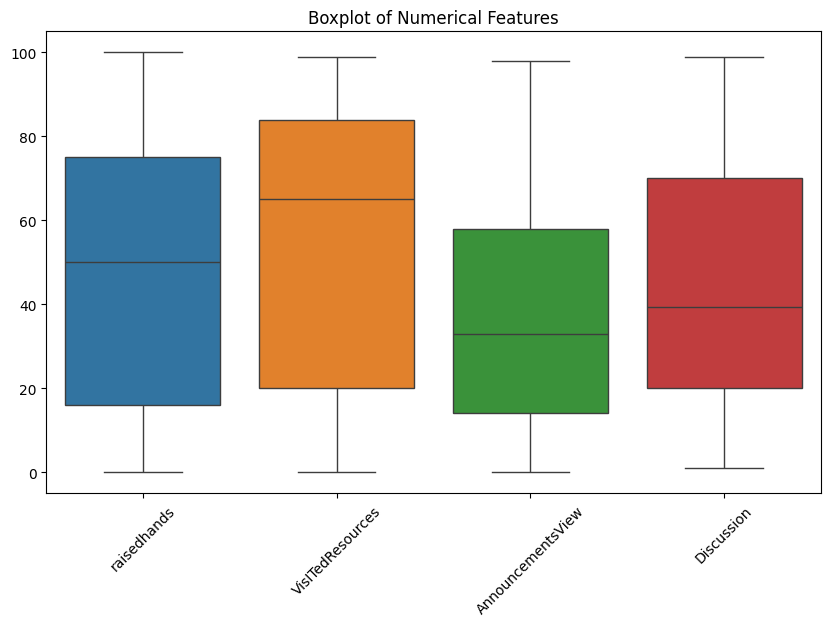

Original shape: (478, 17)
Shape after outlier removal: (478, 17)


In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# IQR method for outlier detection and removal (example for 'raisedhands')
Q1 = df['raisedhands'].quantile(0.25)
Q3 = df['raisedhands'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['raisedhands'] >= lower_bound) & (df['raisedhands'] <= upper_bound)]

Q1 = df['VisITedResources'].quantile(0.25)
Q3 = df['VisITedResources'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers['VisITedResources'] >= lower_bound) & (df_no_outliers['VisITedResources'] <= upper_bound)]

Q1 = df['AnnouncementsView'].quantile(0.25)
Q3 = df['AnnouncementsView'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers['AnnouncementsView'] >= lower_bound) & (df_no_outliers['AnnouncementsView'] <= upper_bound)]

Q1 = df['Discussion'].quantile(0.25)
Q3 = df['Discussion'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers['Discussion'] >= lower_bound) & (df_no_outliers['Discussion'] <= upper_bound)]

print(f"Original shape: {df.shape}")
print(f"Shape after outlier removal: {df_no_outliers.shape}")

# **EDA**

### **Distribution of Qualitative Variables**

        jumlah sampel  persentase
gender                           
M                 303        63.4
F                 175        36.6


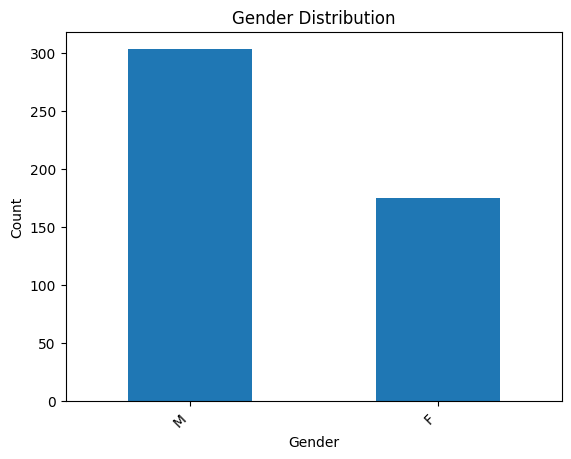

In [17]:
count = df['gender'].value_counts()
percent = 100*df['gender'].value_counts(normalize=True)
df_gender = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_gender)
count.plot(kind='bar', title='Gender Distribution', xlabel='Gender', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

             jumlah sampel  persentase
NationalITy                           
KW                     179        37.4
Jordan                 170        35.6
Palestine               28         5.9
Iraq                    22         4.6
lebanon                 17         3.6
Tunis                   12         2.5
SaudiArabia             11         2.3
Egypt                    9         1.9
Syria                    7         1.5
USA                      6         1.3
Iran                     6         1.3
Lybia                    6         1.3
Morocco                  4         0.8
venzuela                 1         0.2


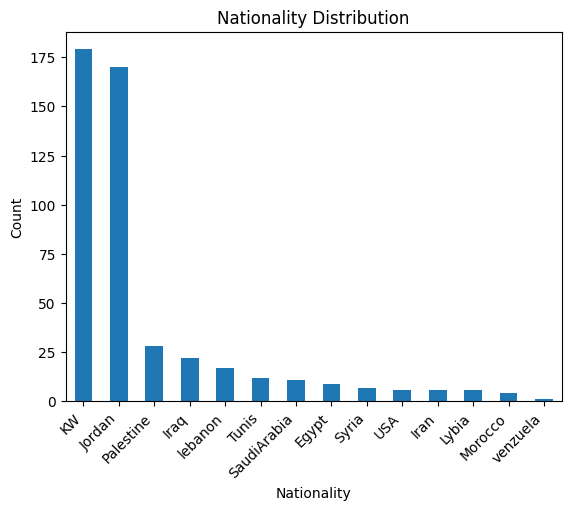

In [18]:
count = df['NationalITy'].value_counts()
percent = 100*df['NationalITy'].value_counts(normalize=True)
df_nationality = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_nationality)
count.plot(kind='bar', title='Nationality Distribution', xlabel='Nationality', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

              jumlah sampel  persentase
PlaceofBirth                           
KuwaIT                  180        37.7
Jordan                  174        36.4
Iraq                     22         4.6
lebanon                  19         4.0
USA                      16         3.3
SaudiArabia              16         3.3
Palestine                10         2.1
Egypt                     9         1.9
Tunis                     9         1.9
Iran                      6         1.3
Syria                     6         1.3
Lybia                     6         1.3
Morocco                   4         0.8
venzuela                  1         0.2


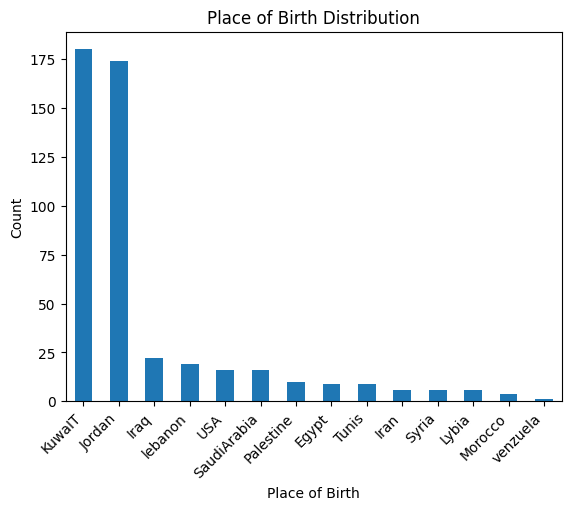

In [19]:
count = df['PlaceofBirth'].value_counts()
percent = 100*df['PlaceofBirth'].value_counts(normalize=True)
df_pob = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_pob)
count.plot(kind='bar', title='Place of Birth Distribution', xlabel='Place of Birth', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

              jumlah sampel  persentase
StageID                                
MiddleSchool            248        51.9
lowerlevel              197        41.2
HighSchool               33         6.9


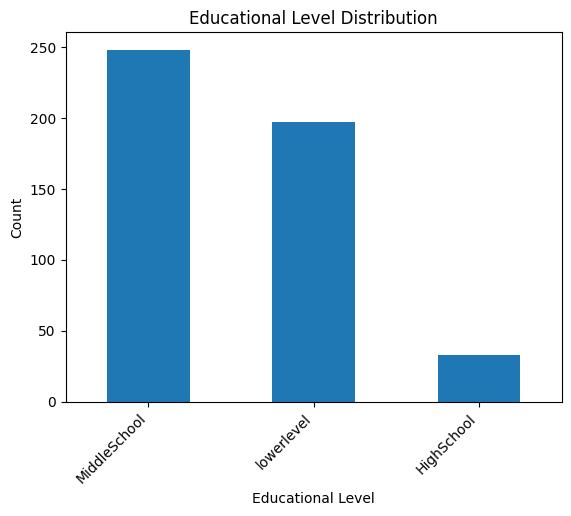

In [20]:
count = df['StageID'].value_counts()
percent = 100*df['StageID'].value_counts(normalize=True)
df_stage = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_stage)
count.plot(kind='bar', title='Educational Level Distribution', xlabel='Educational Level', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

         jumlah sampel  persentase
GradeID                           
G-02               145        30.3
G-08               116        24.3
G-07               101        21.1
G-04                48        10.0
G-06                32         6.7
G-11                13         2.7
G-12                11         2.3
G-09                 5         1.0
G-10                 4         0.8
G-05                 3         0.6


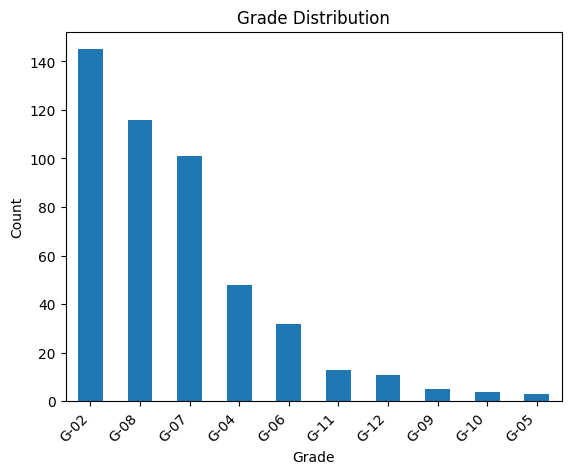

In [21]:
count = df['GradeID'].value_counts()
percent = 100*df['GradeID'].value_counts(normalize=True)
df_grade = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_grade)
count.plot(kind='bar', title='Grade Distribution', xlabel='Grade', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
#terdapat ketidaksesuaian antara jumlah eduacational level dan grade di mana seharusnya
#lower ~ G01 - G05
#middle ~ G06 - G08
#high ~ G09 - G12

# Replace values in column 'StageID' where values in column 'GradeID' are equal to 'G-07'
df.loc[df['GradeID'] == 'G-07', 'StageID'] = 'MiddleSchool'

              jumlah sampel  persentase
StageID                                
MiddleSchool            249        52.1
lowerlevel              196        41.0
HighSchool               33         6.9


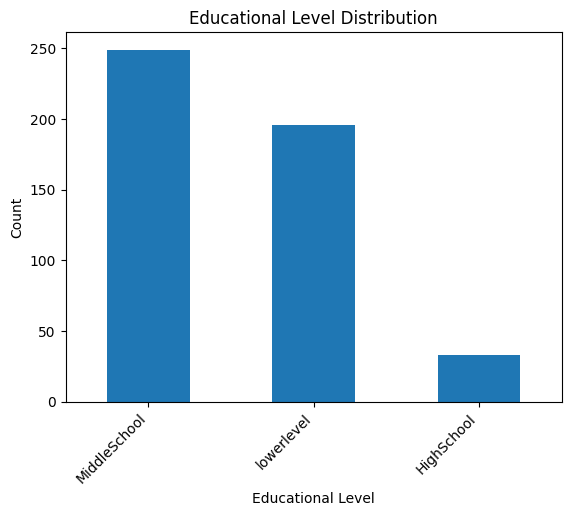

In [23]:
count = df['StageID'].value_counts()
percent = 100*df['StageID'].value_counts(normalize=True)
df_stage = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_stage)
count.plot(kind='bar', title='Educational Level Distribution', xlabel='Educational Level', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

           jumlah sampel  persentase
SectionID                           
A                    281        58.8
B                    167        34.9
C                     30         6.3


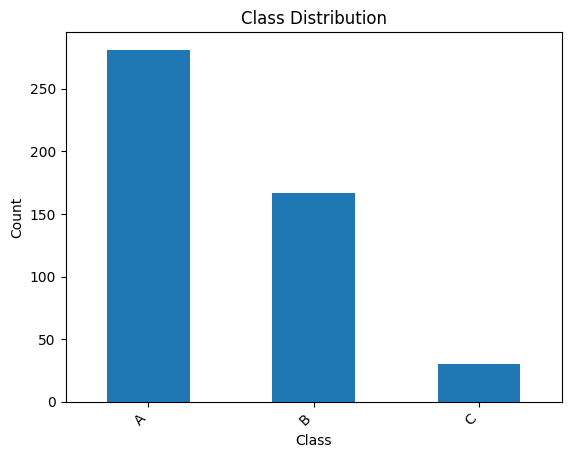

In [24]:
count = df['SectionID'].value_counts()
percent = 100*df['SectionID'].value_counts(normalize=True)
df_class = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_class)
count.plot(kind='bar', title='Class Distribution', xlabel='Class', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

           jumlah sampel  persentase
Topic                               
IT                    95        19.9
French                63        13.2
Arabic                59        12.3
Science               51        10.7
English               45         9.4
Biology               30         6.3
Spanish               25         5.2
Geology               24         5.0
Chemistry             24         5.0
Quran                 22         4.6
Math                  21         4.4
History               19         4.0


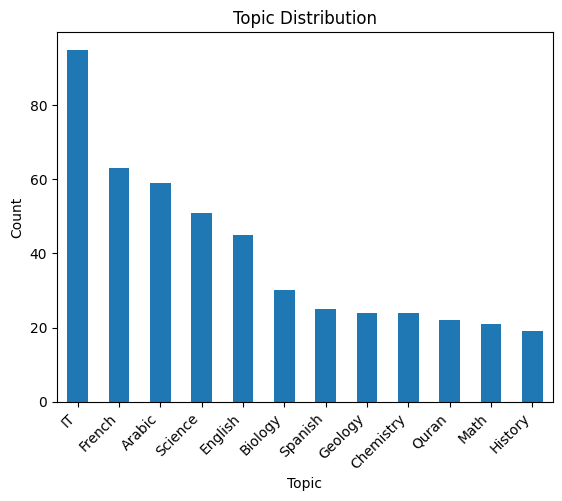

In [25]:
count = df['Topic'].value_counts()
percent = 100*df['Topic'].value_counts(normalize=True)
df_topic = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_topic)
count.plot(kind='bar', title='Topic Distribution', xlabel='Topic', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

          jumlah sampel  persentase
Semester                           
F                   244        51.0
S                   234        49.0


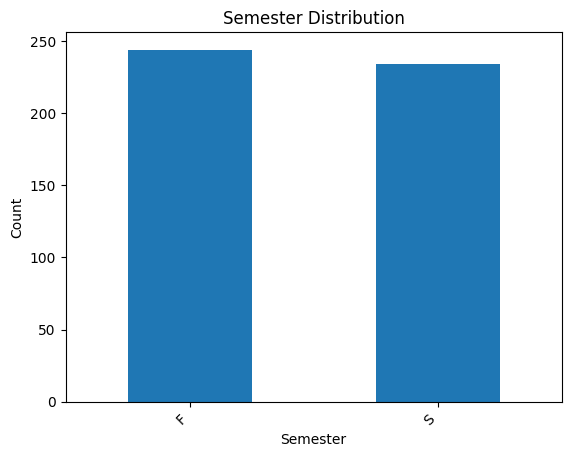

In [26]:
count = df['Semester'].value_counts()
percent = 100*df['Semester'].value_counts(normalize=True)
df_semester = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_semester)
count.plot(kind='bar', title='Semester Distribution', xlabel='Semester', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

          jumlah sampel  persentase
Relation                           
Father              281        58.8
Mum                 197        41.2


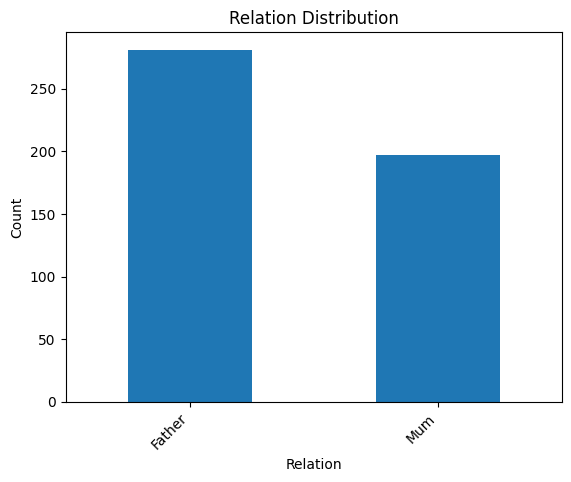

In [27]:
count = df['Relation'].value_counts()
percent = 100*df['Relation'].value_counts(normalize=True)
df_relation = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_relation)
count.plot(kind='bar', title='Relation Distribution', xlabel='Relation', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

                       jumlah sampel  persentase
ParentAnsweringSurvey                           
Yes                              270        56.5
No                               208        43.5


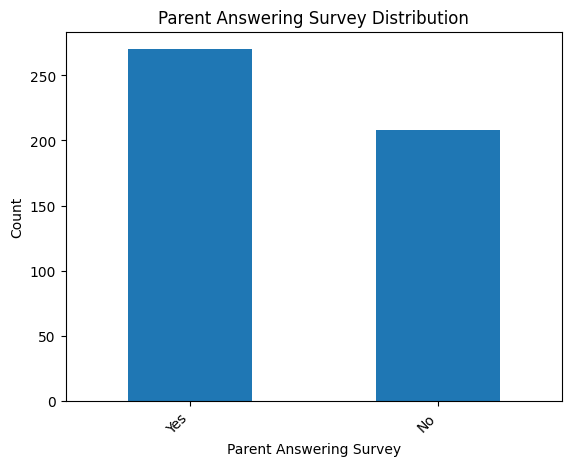

In [28]:
count = df['ParentAnsweringSurvey'].value_counts()
percent = 100*df['ParentAnsweringSurvey'].value_counts(normalize=True)
df_survey = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_survey)
count.plot(kind='bar', title='Parent Answering Survey Distribution', xlabel='Parent Answering Survey', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

                          jumlah sampel  persentase
ParentschoolSatisfaction                           
Good                                292        61.1
Bad                                 186        38.9


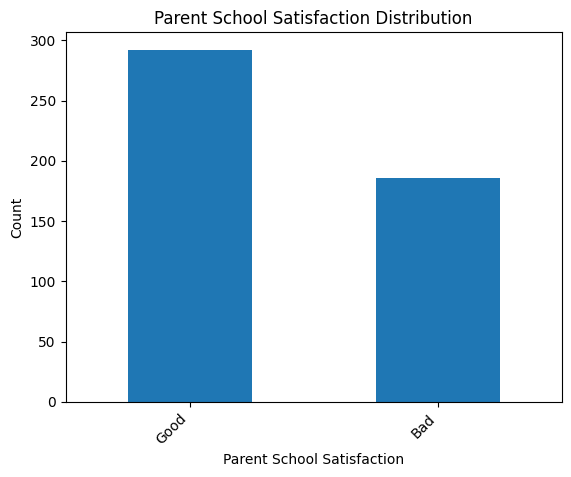

In [29]:
count = df['ParentschoolSatisfaction'].value_counts()
percent = 100*df['ParentschoolSatisfaction'].value_counts(normalize=True)
df_satisfaction = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_satisfaction)
count.plot(kind='bar', title='Parent School Satisfaction Distribution', xlabel='Parent School Satisfaction', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

                    jumlah sampel  persentase
StudentAbsenceDays                           
Under-7                       289        60.5
Above-7                       189        39.5


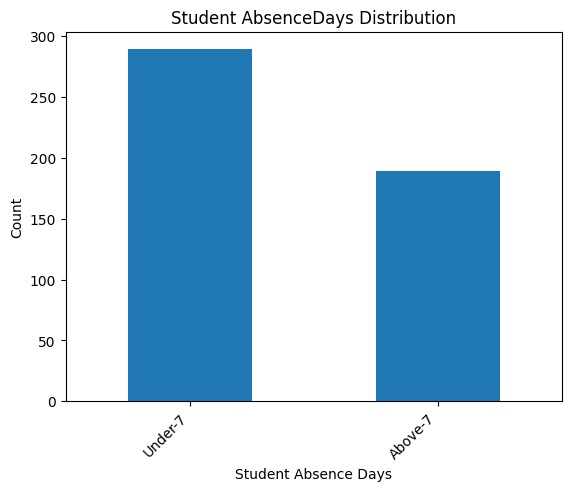

In [30]:
count = df['StudentAbsenceDays'].value_counts()
percent = 100*df['StudentAbsenceDays'].value_counts(normalize=True)
df_absence = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_absence)
count.plot(kind='bar', title='Student AbsenceDays Distribution', xlabel='Student Absence Days', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Bivariate Analysis of Qualitative Variables**

In [31]:
categorical_features = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester',
                        'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

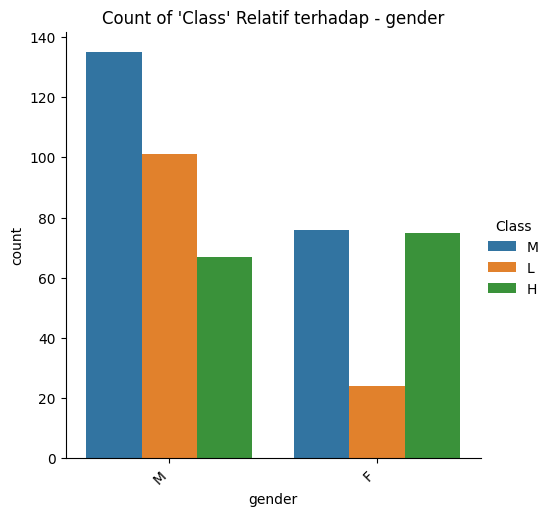

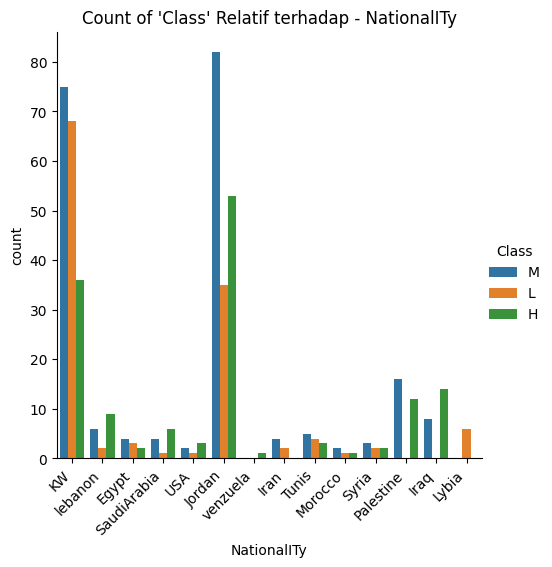

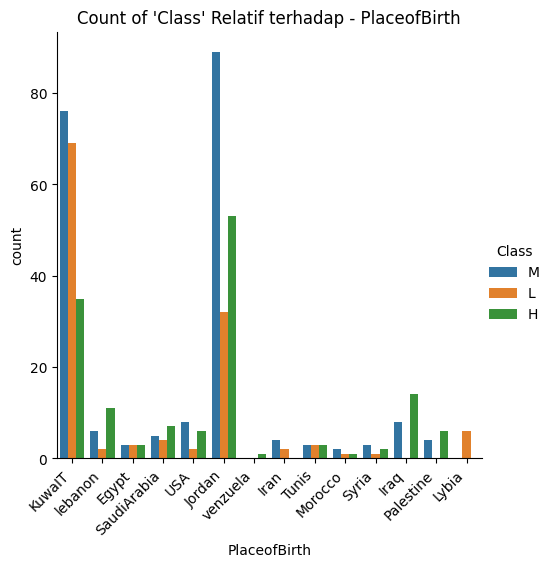

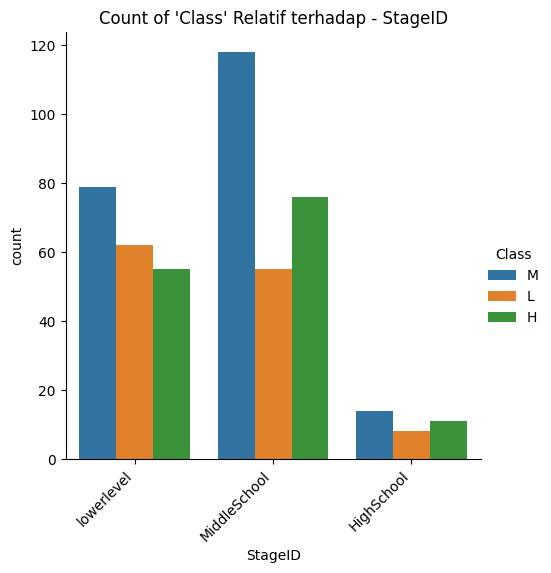

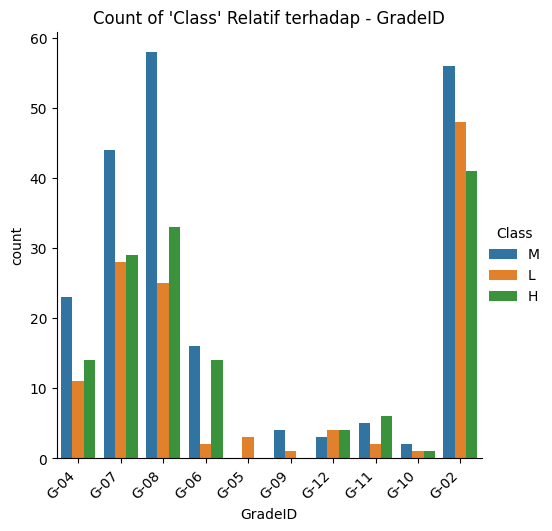

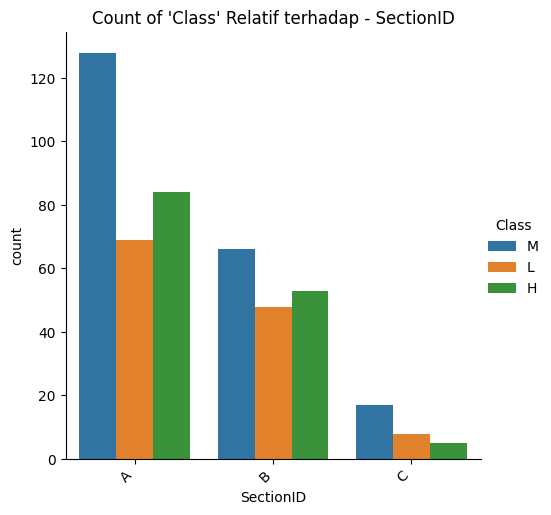

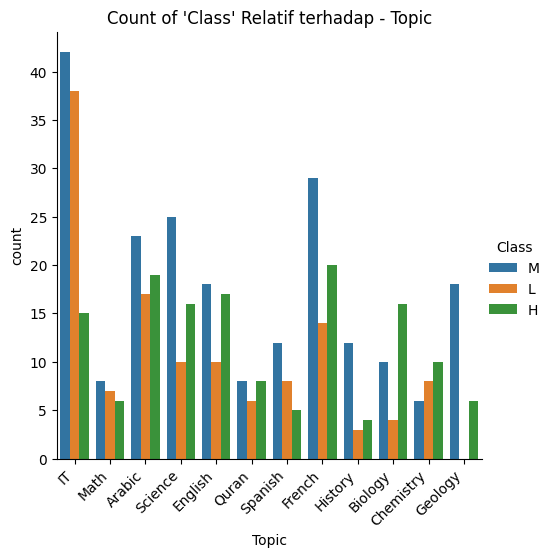

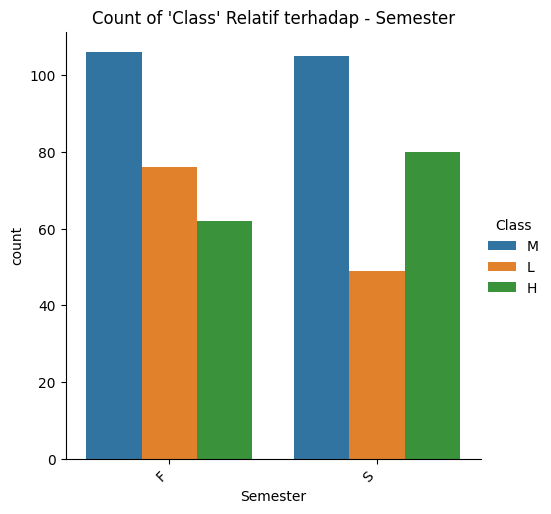

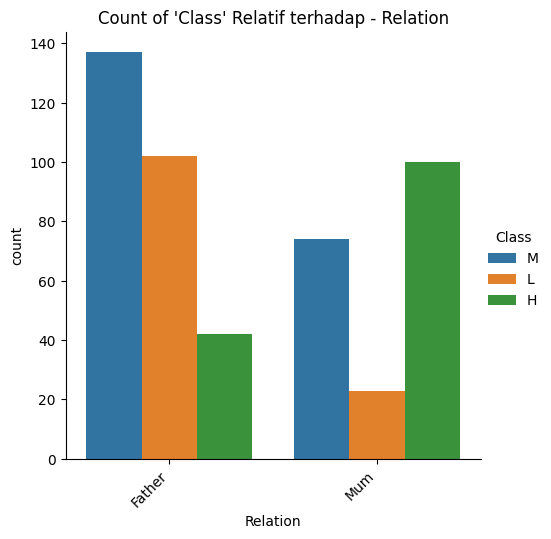

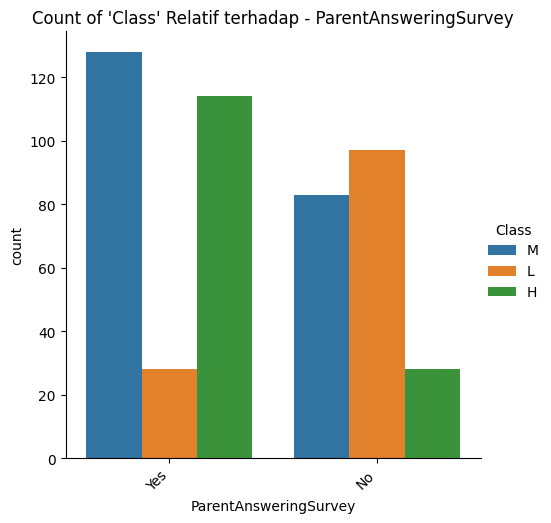

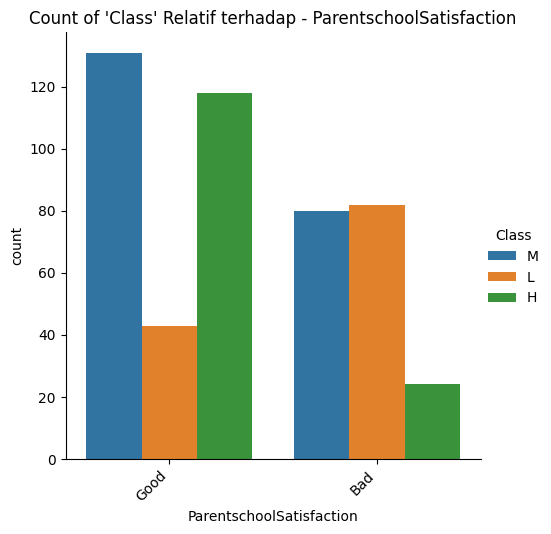

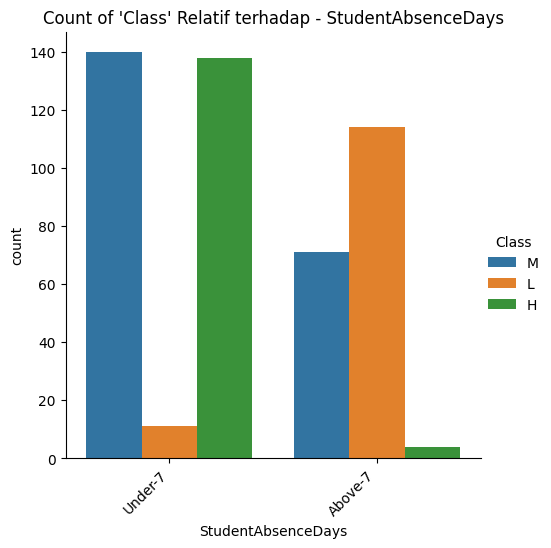

In [32]:
for feature in categorical_features:
    counts = df.groupby([feature, 'Class'])['Class'].count().reset_index(name='Counts')

    sns.catplot(data=df, x=feature, hue='Class', kind="count", dodge=True)
    plt.title(f"Count of 'Class' Relatif terhadap - {feature}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

### **Correlation Between Quantitative Variables**

In [33]:
correlation_matrix = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].corr()

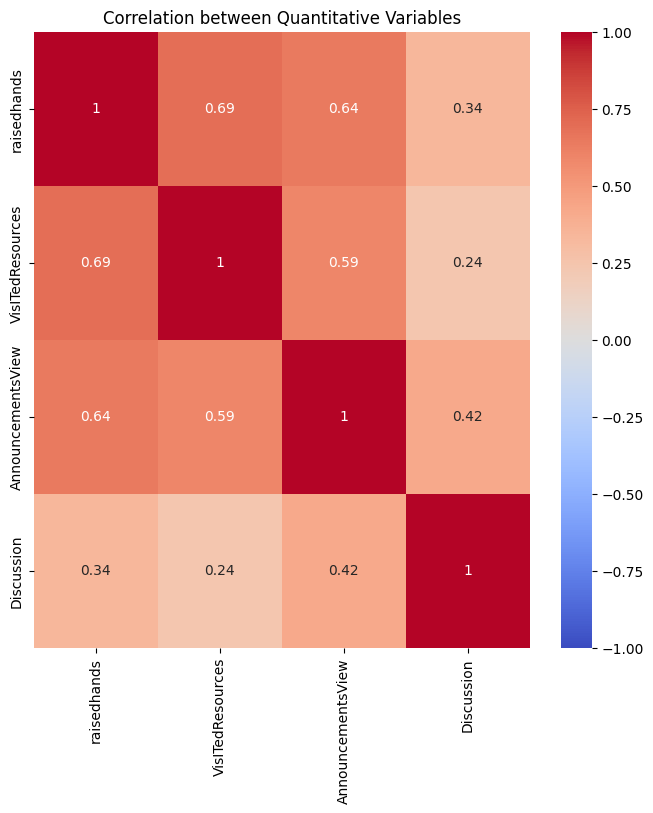

In [34]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Quantitative Variables')
plt.show()

# **Feature Selection**

### **Feature Selection for Categorical Value**

In [35]:
#List of chi value p-value & cramer's v
chi_value = []
p_value = []
cramer_v = []

**Gender & Class**

In [36]:
#Contingency Table
contingency_table1 = pd.crosstab(df['gender'], df['Class'])
print(contingency_table1)

Class    H    L    M
gender              
F       75   24   76
M       67  101  135


In [37]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table1)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 9.078110951461649e-08
Dependent (reject H0)


In [38]:
#Cramer's V
N = np.sum(contingency_table1.values)
minimum_dimension = min(contingency_table1.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.2604696001984065


**Nationality & Class**

In [39]:
#Contingency Table
contingency_table2 = pd.crosstab(df['NationalITy'], df['Class'])
print(contingency_table2)

Class         H   L   M
NationalITy            
Egypt         2   3   4
Iran          0   2   4
Iraq         14   0   8
Jordan       53  35  82
KW           36  68  75
Lybia         0   6   0
Morocco       1   1   2
Palestine    12   0  16
SaudiArabia   6   1   4
Syria         2   2   3
Tunis         3   4   5
USA           3   1   2
lebanon       9   2   6
venzuela      1   0   0


In [40]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table2)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 1.2102002120867419e-06
Dependent (reject H0)


In [41]:
#Cramer's V
N = np.sum(contingency_table2.values)
minimum_dimension = min(contingency_table2.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.2800857589201755


**Place of Birth & Class**

In [42]:
#Contingency Table
contingency_table3 = pd.crosstab(df['PlaceofBirth'], df['Class'])
print(contingency_table3)

Class          H   L   M
PlaceofBirth            
Egypt          3   3   3
Iran           0   2   4
Iraq          14   0   8
Jordan        53  32  89
KuwaIT        35  69  76
Lybia          0   6   0
Morocco        1   1   2
Palestine      6   0   4
SaudiArabia    7   4   5
Syria          2   1   3
Tunis          3   3   3
USA            6   2   8
lebanon       11   2   6
venzuela       1   0   0


In [43]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table3)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 6.032312725291548e-07
Dependent (reject H0)


In [44]:
#Cramer's V
N = np.sum(contingency_table3.values)
minimum_dimension = min(contingency_table3.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.2838014419705211


**Educational Level & Class**

In [45]:
#Contingency Table
contingency_table4 = pd.crosstab(df['StageID'], df['Class'])
print(contingency_table4)

Class          H   L    M
StageID                  
HighSchool    11   8   14
MiddleSchool  76  55  118
lowerlevel    55  62   79


In [46]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table4)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 0.23793607877386658
Independent (H0 holds true)


In [47]:
#Cramer's V
N = np.sum(contingency_table4.values)
minimum_dimension = min(contingency_table4.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.07599045517984578


**Grade & Class**

In [48]:
#Contingency Table
contingency_table5 = pd.crosstab(df['GradeID'], df['Class'])
print(contingency_table5)

Class     H   L   M
GradeID            
G-02     41  48  56
G-04     14  11  23
G-05      0   3   0
G-06     14   2  16
G-07     29  28  44
G-08     33  25  58
G-09      0   1   4
G-10      1   1   2
G-11      6   2   5
G-12      4   4   3


In [49]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table5)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 0.060443759229838086
Independent (H0 holds true)


In [50]:
#Cramer's V
N = np.sum(contingency_table5.values)
minimum_dimension = min(contingency_table5.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.17146645914533043


**Classroom & Class**

In [51]:
#Contingency Table
contingency_table6 = pd.crosstab(df['SectionID'], df['Class'])
print(contingency_table6)

Class       H   L    M
SectionID             
A          84  69  128
B          53  48   66
C           5   8   17


In [52]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table6)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 0.32420452324064053
Independent (H0 holds true)


In [53]:
#Cramer's V
N = np.sum(contingency_table6.values)
minimum_dimension = min(contingency_table6.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.0698035991565097


**Topic & Class**

In [54]:
#Contingency Table
contingency_table7 = pd.crosstab(df['Topic'], df['Class'])
print(contingency_table7)

Class       H   L   M
Topic                
Arabic     19  17  23
Biology    16   4  10
Chemistry  10   8   6
English    17  10  18
French     20  14  29
Geology     6   0  18
History     4   3  12
IT         15  38  42
Math        6   7   8
Quran       8   6   8
Science    16  10  25
Spanish     5   8  12


In [55]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table7)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 0.002145749514203939
Dependent (reject H0)


In [56]:
#Cramer's V
N = np.sum(contingency_table7.values)
minimum_dimension = min(contingency_table7.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.21869678971258127


**Semester & Class**

In [57]:
#Contingency Table
contingency_table8 = pd.crosstab(df['Semester'], df['Class'])
print(contingency_table8)

Class      H   L    M
Semester             
F         62  76  106
S         80  49  105


In [58]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table8)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 0.01913294059479174
Dependent (reject H0)


In [59]:
#Cramer's V
N = np.sum(contingency_table8.values)
minimum_dimension = min(contingency_table8.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.12866133728143067


**Relation & Class**

In [60]:
#Contingency Table
contingency_table9 = pd.crosstab(df['Relation'], df['Class'])
print(contingency_table9)

Class       H    L    M
Relation               
Father     42  102  137
Mum       100   23   74


In [61]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table9)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 3.957197834937713e-18
Dependent (reject H0)


In [62]:
#Cramer's V
N = np.sum(contingency_table9.values)
minimum_dimension = min(contingency_table9.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.4094643685436941


**Parents Answering Survey & Class**

In [63]:
#Contingency Table
contingency_table10 = pd.crosstab(df['ParentAnsweringSurvey'], df['Class'])
print(contingency_table10)

Class                    H   L    M
ParentAnsweringSurvey              
No                      28  97   83
Yes                    114  28  128


In [64]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table10)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 5.504470538968544e-21
Dependent (reject H0)


In [65]:
#Cramer's V
N = np.sum(contingency_table10.values)
minimum_dimension = min(contingency_table10.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.4417951510647469


**Parents School Satisfaction & Class**

In [66]:
#Contingency Table
contingency_table11 = pd.crosstab(df['ParentschoolSatisfaction'], df['Class'])
print(contingency_table11)

Class                       H   L    M
ParentschoolSatisfaction              
Bad                        24  82   80
Good                      118  43  131


In [67]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table11)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 3.6583953288329044e-15
Dependent (reject H0)


In [68]:
#Cramer's V
N = np.sum(contingency_table11.values)
minimum_dimension = min(contingency_table11.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.37294346424708347


**Student's Absence Days & Class**

In [69]:
#Contingency Table
contingency_table12 = pd.crosstab(df['StudentAbsenceDays'], df['Class'])
print(contingency_table12)

Class                 H    L    M
StudentAbsenceDays               
Above-7               4  114   71
Under-7             138   11  140


In [70]:
#Chi-square
stat, p, dof, expected = chi2_contingency(contingency_table12)
chi_value.append(stat)

# interpret p-value
alpha = 0.05
print(f"P-value is {p}")
p_value.append(p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value is 4.348596053268476e-49
Dependent (reject H0)


In [71]:
#Cramer's V
N = np.sum(contingency_table12.values)
minimum_dimension = min(contingency_table12.shape)-1

# Calculate Cramer's V
result = np.sqrt((stat/N) / minimum_dimension)

# Print the result
print(f"Cramér's Coefficient V is {result}")
cramer_v.append(result)

Cramér's Coefficient V is 0.6825892634319862


In [72]:
results_df = pd.DataFrame({
    'Variable': ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester',
                 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays'],
    'Chi-square': chi_value,
    'P-value': p_value,
    "Cramer's V": cramer_v
})

# Rank the variables based on Cramer's V in descending order
results_df = results_df.sort_values(by="Cramer's V", ascending=False)
results_df = results_df.reset_index(drop=True)

results_df

,Variable,Chi-square,P-value,Cramer's V
0,StudentAbsenceDays,222.713633,4.348596e-49,0.682589
1,ParentAnsweringSurvey,93.297453,5.504471e-21,0.441795
2,Relation,80.141991,3.957198e-18,0.409464
3,ParentschoolSatisfaction,66.483504,3.658395e-15,0.372943
4,PlaceofBirth,76.999355,6.032313e-07,0.283801
5,NationalITy,74.996319,1.210200e-06,0.280086
6,gender,32.429629,9.078111e-08,0.260470
7,Topic,45.723841,2.145750e-03,0.218697
8,GradeID,28.107114,6.044376e-02,0.171466
9,Semester,7.912688,1.913294e-02,0.128661


### **Feature Selection for Numerical Value**

**Convert ordinal data (target) to numeric value**

In [73]:
dataMapping = {
    "L": 1,
    "M": 2,
    "H": 3
}

In [74]:
df['ClassNum'] = df['Class'].map(dataMapping)

In [75]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,ClassNum
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L,1
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M,2
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M,2
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L,1


In [76]:
spearman = []
pvalue = []

**Raised Hands & Class**

In [77]:
corr, pval = spearmanr(df['raisedhands'], df['ClassNum'])
spearman.append(corr)
pvalue.append(pval)

# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)
alpha = 0.05
if pval <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Spearman's correlation coefficient: 0.6480369857353329
p-value: 2.8476753734282175e-58
Dependent (reject H0)


**Visited Resources & Class**

In [78]:
corr, pval = spearmanr(df['VisITedResources'], df['ClassNum'])
spearman.append(corr)
pvalue.append(pval)

# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)
alpha = 0.05
if pval <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Spearman's correlation coefficient: 0.6610936583479862
p-value: 2.2607422736193928e-61
Dependent (reject H0)


**Announcements View & Class**

In [79]:
corr, pval = spearmanr(df['AnnouncementsView'], df['ClassNum'])
spearman.append(corr)
pvalue.append(pval)

# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)
alpha = 0.05
if pval <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Spearman's correlation coefficient: 0.5431088104954139
p-value: 5.008387420768423e-38
Dependent (reject H0)


**Discussion & Class**

In [80]:
corr, pval = spearmanr(df['Discussion'], df['ClassNum'])
spearman.append(corr)
pvalue.append(pval)

# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)
alpha = 0.05
if pval <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Spearman's correlation coefficient: 0.3131128152911889
p-value: 2.4764511031480594e-12
Dependent (reject H0)


In [81]:
results_df2 = pd.DataFrame({
    'Variable': ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'],
    'P-value': pvalue,
    'Corr': spearman
})

# Rank the variables based on ANOVA in descending order
results_df2 = results_df2.sort_values(by='Corr', ascending=False)
results_df2 = results_df2.reset_index(drop=True)

results_df2

,Variable,P-value,Corr
0,VisITedResources,2.260742e-61,0.661094
1,raisedhands,2.847675e-58,0.648037
2,AnnouncementsView,5.008387e-38,0.543109
3,Discussion,2.476451e-12,0.313113


# **6 Features (Difference) 90:5:5**

### **New DataFrame**

In [82]:
new_df3 = df[['StudentAbsenceDays','ParentAnsweringSurvey', 'Relation',
             'AnnouncementsView', 'raisedhands', 'VisITedResources', 'Class']].copy()

In [83]:
new_df3.head()

,StudentAbsenceDays,ParentAnsweringSurvey,Relation,AnnouncementsView,raisedhands,VisITedResources,Class
0,Under-7,Yes,Father,2,15,16,M
1,Under-7,Yes,Father,3,20,20,M
2,Above-7,No,Father,0,10,7,L
3,Above-7,No,Father,5,30,25,L
4,Above-7,No,Father,12,40,50,M


### **Encoding Categorical Features**

In [84]:
categorical_columns = ['StudentAbsenceDays','ParentAnsweringSurvey', 'Relation']

In [85]:
# Convert categorical columns to 'category' data type
for col in categorical_columns:
    new_df3[col] = new_df3[col].astype('category')

In [86]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 479
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   StudentAbsenceDays     478 non-null    category
 1   ParentAnsweringSurvey  478 non-null    category
 2   Relation               478 non-null    category
 3   AnnouncementsView      478 non-null    uint8   
 4   raisedhands            478 non-null    uint8   
 5   VisITedResources       478 non-null    uint8   
 6   Class                  478 non-null    object  
dtypes: category(3), object(1), uint8(3)
memory usage: 10.6+ KB


### **Encoding Categorical Target**

In [87]:
encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])
new_df3['Class_encoded'] = encoder.fit_transform(new_df3[['Class']])

In [88]:
new_df3.head(11)

,StudentAbsenceDays,ParentAnsweringSurvey,Relation,AnnouncementsView,raisedhands,VisITedResources,Class,Class_encoded
0,Under-7,Yes,Father,2,15,16,M,1.0
1,Under-7,Yes,Father,3,20,20,M,1.0
2,Above-7,No,Father,0,10,7,L,0.0
3,Above-7,No,Father,5,30,25,L,0.0
4,Above-7,No,Father,12,40,50,M,1.0
5,Above-7,Yes,Father,13,42,30,M,1.0
6,Above-7,No,Father,0,35,12,L,0.0
7,Under-7,Yes,Father,15,50,10,M,1.0
8,Under-7,Yes,Father,16,12,21,M,1.0
9,Under-7,Yes,Father,25,70,80,M,1.0


In [89]:
X_train, X_temp, y_train, y_temp = train_test_split(new_df3.drop(['Class', 'Class_encoded'], axis=1), new_df3['Class_encoded'], test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [90]:
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (430, 6), (430,)
Validation data shape: (24, 6), (24,)
Testing data shape: (24, 6), (24,)


### **Classification with XGBoost (Initial Model)**

In [91]:
# Initialize and train the model
model = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0])
                      )

In [92]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [93]:
# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 1 1 0 1 1 2 1 0 0 0 1 2 2 1 2 2 1 1 2 1 1 2 2]


In [94]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score on Test Data: {accuracy}")

Accuracy Score on Test Data: 0.6666666666666666


### **Classification with XGBoost (Hyperparameter Tuning)**



In [95]:
param_grid1 = {
    'max_depth':range(1,13,1)
}

In [96]:
# Initialize and train the model
model1 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      seed=42,
                      learning_rate=0.01
                      )

In [97]:
grid_search1 = GridSearchCV(model1, param_grid1, cv=5, scoring='neg_log_loss')

In [98]:
grid_search1.fit(X_train, y_train,
                 eval_set=[(X_val, y_val)],
                 verbose=3)

[0]	validation_0-mlogloss:1.09365
[3]	validation_0-mlogloss:1.07911
[6]	validation_0-mlogloss:1.06506
[9]	validation_0-mlogloss:1.05201
[12]	validation_0-mlogloss:1.03924
[15]	validation_0-mlogloss:1.02799
[18]	validation_0-mlogloss:1.01739
[21]	validation_0-mlogloss:1.00732
[24]	validation_0-mlogloss:0.99726
[27]	validation_0-mlogloss:0.98676
[30]	validation_0-mlogloss:0.97755
[33]	validation_0-mlogloss:0.96844
[36]	validation_0-mlogloss:0.95984
[39]	validation_0-mlogloss:0.95145
[42]	validation_0-mlogloss:0.94260
[45]	validation_0-mlogloss:0.93426
[48]	validation_0-mlogloss:0.92674
[51]	validation_0-mlogloss:0.91914
[54]	validation_0-mlogloss:0.91109
[57]	validation_0-mlogloss:0.90351
[60]	validation_0-mlogloss:0.89645
[63]	validation_0-mlogloss:0.88954
[66]	validation_0-mlogloss:0.88240
[69]	validation_0-mlogloss:0.87571
[72]	validation_0-mlogloss:0.86926
[75]	validation_0-mlogloss:0.86288
[78]	validation_0-mlogloss:0.85634
[81]	validation_0-mlogloss:0.85012
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'max_depth': range(1, 13)}, scoring='neg_log_loss')

In [99]:
grid_search1.cv_results_, grid_search1.best_params_, grid_search1.best_score_

({'mean_fit_time': array([0.25539269, 0.25967755, 0.27071757, 0.32674794, 0.37799168,
         0.4045692 , 0.44629378, 0.50702844, 0.59323697, 0.53541808,
         0.57649045, 0.6432301 ]),
  'std_fit_time': array([0.06824295, 0.01787116, 0.01791082, 0.02334136, 0.02583223,
         0.02447681, 0.02174342, 0.02474559, 0.05629715, 0.02311454,
         0.02665864, 0.02999495]),
  'mean_score_time': array([0.01738939, 0.01260581, 0.01320462, 0.01270666, 0.01451211,
         0.01300387, 0.01341076, 0.01320353, 0.01360402, 0.01390152,
         0.01350646, 0.01288252]),
  'std_score_time': array([0.0097136 , 0.00162667, 0.00075139, 0.00132793, 0.0021729 ,
         0.00109511, 0.00124538, 0.00040095, 0.00149738, 0.0012374 ,
         0.00134708, 0.00067643]),
  'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value=999999),
  

In [100]:
param_grid2 = {
    'min_child_weight':range(1,13,1)
}

In [101]:
# Initialize and train the model
model2 = XGBClassifier(enable_categorical=True,
                       objective='multi:softmax',
                       num_class=len(encoder.categories_[0]),
                       seed=42,
                       learning_rate=0.01,
                       max_depth=9
                      )

In [102]:
grid_search2 = GridSearchCV(model2, param_grid2, cv=5, scoring='neg_log_loss')

In [103]:
grid_search2.fit(X_train, y_train,
                 eval_set=[(X_val, y_val)],
                 verbose=3)

[0]	validation_0-mlogloss:1.08912
[3]	validation_0-mlogloss:1.06135
[6]	validation_0-mlogloss:1.03445
[9]	validation_0-mlogloss:1.00881
[12]	validation_0-mlogloss:0.98329
[15]	validation_0-mlogloss:0.95913
[18]	validation_0-mlogloss:0.93535
[21]	validation_0-mlogloss:0.91244
[24]	validation_0-mlogloss:0.89084
[27]	validation_0-mlogloss:0.86994
[30]	validation_0-mlogloss:0.84967
[33]	validation_0-mlogloss:0.82992
[36]	validation_0-mlogloss:0.81100
[39]	validation_0-mlogloss:0.79238
[42]	validation_0-mlogloss:0.77440
[45]	validation_0-mlogloss:0.75757
[48]	validation_0-mlogloss:0.74206
[51]	validation_0-mlogloss:0.72778
[54]	validation_0-mlogloss:0.71418
[57]	validation_0-mlogloss:0.70017
[60]	validation_0-mlogloss:0.68675
[63]	validation_0-mlogloss:0.67424
[66]	validation_0-mlogloss:0.66212
[69]	validation_0-mlogloss:0.65056
[72]	validation_0-mlogloss:0.63816
[75]	validation_0-mlogloss:0.62591
[78]	validation_0-mlogloss:0.61382
[81]	validation_0-mlogloss:0.60231
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=9,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'min_child_weight': range(1, 13)},
             scoring='neg_log_loss')

In [104]:
grid_search2.cv_results_, grid_search2.best_params_, grid_search2.best_score_

({'mean_fit_time': array([0.65945439, 0.49163184, 0.46415944, 0.44197803, 0.4027626 ,
         0.39524412, 0.35143585, 0.35041542, 0.35691128, 0.3470005 ,
         0.35364094, 0.32542357]),
  'std_fit_time': array([0.08317822, 0.01974763, 0.02805299, 0.0226168 , 0.01066879,
         0.05277963, 0.0415455 , 0.01511917, 0.03011154, 0.04143985,
         0.02789933, 0.02337097]),
  'mean_score_time': array([0.01493902, 0.01320953, 0.01350446, 0.01300583, 0.01310682,
         0.01300254, 0.012604  , 0.01390853, 0.01260328, 0.01291542,
         0.01303906, 0.01390691]),
  'std_score_time': array([0.00176297, 0.00136732, 0.00184295, 0.00137855, 0.00080511,
         0.00155188, 0.00080186, 0.00291247, 0.00102068, 0.00093709,
         0.00103304, 0.00364033]),
  'param_min_child_weight': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value=9999

In [105]:
param_grid3 = {
    'gamma': [i/10.0 for i in range(0,5)]
}

In [106]:
# Initialize and train the model
model3 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=9,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01
                      )

In [107]:
grid_search3 = GridSearchCV(model3, param_grid3, cv=5, scoring='neg_log_loss')

In [108]:
grid_search3.fit(X_train, y_train,
                 eval_set=[(X_val, y_val)],
                 verbose=3)

[0]	validation_0-mlogloss:1.08912
[3]	validation_0-mlogloss:1.06135
[6]	validation_0-mlogloss:1.03445
[9]	validation_0-mlogloss:1.00881
[12]	validation_0-mlogloss:0.98329
[15]	validation_0-mlogloss:0.95913
[18]	validation_0-mlogloss:0.93535
[21]	validation_0-mlogloss:0.91244
[24]	validation_0-mlogloss:0.89084
[27]	validation_0-mlogloss:0.86994
[30]	validation_0-mlogloss:0.84967
[33]	validation_0-mlogloss:0.82992
[36]	validation_0-mlogloss:0.81100
[39]	validation_0-mlogloss:0.79238
[42]	validation_0-mlogloss:0.77440
[45]	validation_0-mlogloss:0.75757
[48]	validation_0-mlogloss:0.74206
[51]	validation_0-mlogloss:0.72778
[54]	validation_0-mlogloss:0.71418
[57]	validation_0-mlogloss:0.70017
[60]	validation_0-mlogloss:0.68675
[63]	validation_0-mlogloss:0.67424
[66]	validation_0-mlogloss:0.66212
[69]	validation_0-mlogloss:0.65056
[72]	validation_0-mlogloss:0.63816
[75]	validation_0-mlogloss:0.62591
[78]	validation_0-mlogloss:0.61382
[81]	validation_0-mlogloss:0.60231
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=9,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='neg_log_loss')

In [109]:
grid_search3.cv_results_, grid_search3.best_params_, grid_search3.best_score_

({'mean_fit_time': array([0.48183475, 0.451685  , 0.44567199, 0.4735815 , 0.44121408]),
  'std_fit_time': array([0.02782055, 0.02310293, 0.03167222, 0.041947  , 0.0287226 ]),
  'mean_score_time': array([0.01280274, 0.01350698, 0.01330566, 0.01310573, 0.0127069 ]),
  'std_score_time': array([0.00097984, 0.00063912, 0.00107695, 0.00196646, 0.00051234]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([-0.7317424 , -0.73130983, -0.73041015, -0.73270095, -0.74267864]),
  'split1_test_score': array([-0.7495671 , -0.7506862 , -0.74876073, -0.74607852, -0.74978446]),
  'split2_test_score': array([-0.75362987, -0.75217758, -0.75573736, -0.74949078, -0.74821037]),
  'split3_test_score': array([-0.78569741, -0.78974565, -0.78474542, -0.78258516, -0.78190901]),
  'sp

In [110]:
param_grid4 = {
    'subsample':[i/10.0 for i in range(6,10)]
}

In [111]:
# Initialize and train the model
model4 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=9,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01,
                      gamma=0.3
                      )

In [112]:
grid_search4 = GridSearchCV(model4, param_grid4, cv=5, scoring='neg_log_loss')

In [113]:
grid_search4.fit(X_train, y_train,
                 eval_set=[(X_val, y_val)],
                 verbose=3)

[0]	validation_0-mlogloss:1.09097
[3]	validation_0-mlogloss:1.06555
[6]	validation_0-mlogloss:1.04289
[9]	validation_0-mlogloss:1.01707
[12]	validation_0-mlogloss:0.99765
[15]	validation_0-mlogloss:0.97641
[18]	validation_0-mlogloss:0.95587
[21]	validation_0-mlogloss:0.93784
[24]	validation_0-mlogloss:0.91896
[27]	validation_0-mlogloss:0.90112
[30]	validation_0-mlogloss:0.88403
[33]	validation_0-mlogloss:0.86673
[36]	validation_0-mlogloss:0.84921
[39]	validation_0-mlogloss:0.83397
[42]	validation_0-mlogloss:0.81701
[45]	validation_0-mlogloss:0.80319
[48]	validation_0-mlogloss:0.78669
[51]	validation_0-mlogloss:0.77175
[54]	validation_0-mlogloss:0.76002
[57]	validation_0-mlogloss:0.74814
[60]	validation_0-mlogloss:0.73458
[63]	validation_0-mlogloss:0.72352
[66]	validation_0-mlogloss:0.71162
[69]	validation_0-mlogloss:0.69934
[72]	validation_0-mlogloss:0.68745
[75]	validation_0-mlogloss:0.67511
[78]	validation_0-mlogloss:0.66481
[81]	validation_0-mlogloss:0.65410
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=0.3,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=9,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='neg_log_loss')

In [114]:
grid_search4.cv_results_, grid_search4.best_params_, grid_search4.best_score_

({'mean_fit_time': array([0.54620357, 0.47399368, 0.48304119, 0.45353389]),
  'std_fit_time': array([0.12683536, 0.0294106 , 0.02736209, 0.04061228]),
  'mean_score_time': array([0.01556711, 0.01490574, 0.01310558, 0.01390748]),
  'std_score_time': array([0.00181795, 0.00162493, 0.00020447, 0.00080187]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.8, 0.9],
               mask=[False, False, False, False],
         fill_value=1e+20),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.8},
   {'subsample': 0.9}],
  'split0_test_score': array([-0.76470064, -0.75450578, -0.74848771, -0.74340222]),
  'split1_test_score': array([-0.75567184, -0.75281665, -0.75386579, -0.75104938]),
  'split2_test_score': array([-0.75186945, -0.74436286, -0.74662231, -0.74300889]),
  'split3_test_score': array([-0.77087808, -0.76685955, -0.77366241, -0.78089711]),
  'split4_test_score': array([-0.78513044, -0.78012766, -0.78554847, -0.78397006]),
  'mean_test_score': array([-0.7

In [115]:
param_grid5 = {
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [116]:
# Initialize and train the model
model5 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=9,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01,
                      gamma=0.3,
                      subsample=0.7
                      )

In [117]:
grid_search5 = GridSearchCV(model5, param_grid5, cv=5, scoring='neg_log_loss')

In [118]:
grid_search5.fit(X_train, y_train,
                 eval_set=[(X_val, y_val)],
                 verbose=3)

[0]	validation_0-mlogloss:1.09288
[3]	validation_0-mlogloss:1.07231
[6]	validation_0-mlogloss:1.05367
[9]	validation_0-mlogloss:1.03655
[12]	validation_0-mlogloss:1.01953
[15]	validation_0-mlogloss:1.00196
[18]	validation_0-mlogloss:0.98735
[21]	validation_0-mlogloss:0.97310
[24]	validation_0-mlogloss:0.95968
[27]	validation_0-mlogloss:0.94316
[30]	validation_0-mlogloss:0.92935
[33]	validation_0-mlogloss:0.91100
[36]	validation_0-mlogloss:0.89738
[39]	validation_0-mlogloss:0.88290
[42]	validation_0-mlogloss:0.86927
[45]	validation_0-mlogloss:0.85689
[48]	validation_0-mlogloss:0.84570
[51]	validation_0-mlogloss:0.83282
[54]	validation_0-mlogloss:0.82076
[57]	validation_0-mlogloss:0.81034
[60]	validation_0-mlogloss:0.79694
[63]	validation_0-mlogloss:0.78584
[66]	validation_0-mlogloss:0.77648
[69]	validation_0-mlogloss:0.76830
[72]	validation_0-mlogloss:0.75766
[75]	validation_0-mlogloss:0.74842
[78]	validation_0-mlogloss:0.73917
[81]	validation_0-mlogloss:0.73026
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=0.3,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=9,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
             scoring='neg_log_loss')

In [119]:
grid_search5.cv_results_, grid_search5.best_params_, grid_search5.best_score_

({'mean_fit_time': array([0.45365324, 0.46625981, 0.44162526, 0.43115182]),
  'std_fit_time': array([0.08204979, 0.0350666 , 0.01673719, 0.02496311]),
  'mean_score_time': array([0.01641107, 0.01340532, 0.01340308, 0.01280255]),
  'std_score_time': array([0.00374315, 0.00135543, 0.00102025, 0.00074724]),
  'param_colsample_bytree': masked_array(data=[0.6, 0.7, 0.8, 0.9],
               mask=[False, False, False, False],
         fill_value=1e+20),
  'params': [{'colsample_bytree': 0.6},
   {'colsample_bytree': 0.7},
   {'colsample_bytree': 0.8},
   {'colsample_bytree': 0.9}],
  'split0_test_score': array([-0.80735114, -0.78327471, -0.78327471, -0.76664612]),
  'split1_test_score': array([-0.78785341, -0.77035355, -0.77035355, -0.76250406]),
  'split2_test_score': array([-0.77825808, -0.76361762, -0.76361762, -0.74887427]),
  'split3_test_score': array([-0.80129103, -0.78431413, -0.78431413, -0.7737522 ]),
  'split4_test_score': array([-0.80181692, -0.78662121, -0.78662121, -0.78038773]

In [120]:
param_grid6 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

In [121]:
# Initialize and train the model
model6 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=9,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01,
                      gamma=0.3,
                      subsample=0.7,
                      colsample_bytree=0.9
                      )

In [122]:
grid_search6 = GridSearchCV(model6, param_grid6, cv=5, scoring='neg_log_loss')

In [123]:
grid_search6.fit(X_train, y_train,
                 eval_set=[(X_val, y_val)],
                 verbose=3)

[0]	validation_0-mlogloss:1.09310
[3]	validation_0-mlogloss:1.06853
[6]	validation_0-mlogloss:1.04387
[9]	validation_0-mlogloss:1.02132
[12]	validation_0-mlogloss:0.99688
[15]	validation_0-mlogloss:0.97736
[18]	validation_0-mlogloss:0.95942
[21]	validation_0-mlogloss:0.94085
[24]	validation_0-mlogloss:0.92309
[27]	validation_0-mlogloss:0.90563
[30]	validation_0-mlogloss:0.88818
[33]	validation_0-mlogloss:0.86988
[36]	validation_0-mlogloss:0.85362
[39]	validation_0-mlogloss:0.83703
[42]	validation_0-mlogloss:0.82241
[45]	validation_0-mlogloss:0.80845
[48]	validation_0-mlogloss:0.79434
[51]	validation_0-mlogloss:0.78154
[54]	validation_0-mlogloss:0.76753
[57]	validation_0-mlogloss:0.75499
[60]	validation_0-mlogloss:0.74201
[63]	validation_0-mlogloss:0.73097
[66]	validation_0-mlogloss:0.72024
[69]	validation_0-mlogloss:0.70991
[72]	validation_0-mlogloss:0.69805
[75]	validation_0-mlogloss:0.68797
[78]	validation_0-mlogloss:0.67787
[81]	validation_0-mlogloss:0.66873
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=0.3,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=9,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='neg_log_loss')

In [124]:
grid_search6.cv_results_, grid_search6.best_params_, grid_search6.best_score_

({'mean_fit_time': array([0.52583599, 0.43861036, 0.41497293, 0.34654894, 0.17576251]),
  'std_fit_time': array([0.0845695 , 0.02509798, 0.02416997, 0.01091496, 0.00554905]),
  'mean_score_time': array([0.01881261, 0.01490507, 0.01320367, 0.01480784, 0.0114049 ]),
  'std_score_time': array([0.00941626, 0.00195875, 0.00097961, 0.00511443, 0.00049025]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1.0, 100.0],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([-0.76664632, -0.76656851, -0.76818954, -0.78990957, -1.09861226]),
  'split1_test_score': array([-0.76250416, -0.76254217, -0.76320783, -0.77682035, -1.09861226]),
  'split2_test_score': array([-0.74887444, -0.74973266, -0.75058061, -0.76865567, -1.09861226]),
  'split3_test_score': array([-0.7737523 , -0.77407123, -0.77393838, -0.

In [125]:
param_grid7 = {
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100]
}

In [126]:
# Initialize and train the model
model7 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=9,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01,
                      gamma=0.3,
                      subsample=0.7,
                      colsample_bytree=0.9,
                      reg_alpha=1e-05
                      )

In [127]:
grid_search7 = GridSearchCV(model7, param_grid7, cv=5, scoring='neg_log_loss')

In [128]:
grid_search7.fit(X_train, y_train,
                 eval_set=[(X_val, y_val)],
                 verbose=3)

[0]	validation_0-mlogloss:1.09215
[3]	validation_0-mlogloss:1.06555
[6]	validation_0-mlogloss:1.03931
[9]	validation_0-mlogloss:1.01396
[12]	validation_0-mlogloss:0.98905
[15]	validation_0-mlogloss:0.96747
[18]	validation_0-mlogloss:0.94733
[21]	validation_0-mlogloss:0.92762
[24]	validation_0-mlogloss:0.90874
[27]	validation_0-mlogloss:0.89019
[30]	validation_0-mlogloss:0.87061
[33]	validation_0-mlogloss:0.85036
[36]	validation_0-mlogloss:0.83104
[39]	validation_0-mlogloss:0.81465
[42]	validation_0-mlogloss:0.80044
[45]	validation_0-mlogloss:0.78506
[48]	validation_0-mlogloss:0.77149
[51]	validation_0-mlogloss:0.75717
[54]	validation_0-mlogloss:0.74212
[57]	validation_0-mlogloss:0.72935
[60]	validation_0-mlogloss:0.71552
[63]	validation_0-mlogloss:0.70329
[66]	validation_0-mlogloss:0.69269
[69]	validation_0-mlogloss:0.68349
[72]	validation_0-mlogloss:0.67245
[75]	validation_0-mlogloss:0.66291
[78]	validation_0-mlogloss:0.65281
[81]	validation_0-mlogloss:0.64352
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=0.3,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=9,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'reg_lambda': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='neg_log_loss')

In [129]:
grid_search7.cv_results_, grid_search7.best_params_, grid_search7.best_score_

({'mean_fit_time': array([0.62969651, 0.52164674, 0.5011281 , 0.45530028, 0.29925308]),
  'std_fit_time': array([0.1239744 , 0.04318804, 0.04518811, 0.03208954, 0.02777766]),
  'mean_score_time': array([0.0145082 , 0.01390576, 0.01550455, 0.01460342, 0.01210623]),
  'std_score_time': array([0.00109723, 0.00201134, 0.00161108, 0.00196117, 0.00128218]),
  'param_reg_lambda': masked_array(data=[1e-05, 0.01, 0.1, 1.0, 100.0],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'reg_lambda': 1e-05},
   {'reg_lambda': 0.01},
   {'reg_lambda': 0.1},
   {'reg_lambda': 1},
   {'reg_lambda': 100}],
  'split0_test_score': array([-0.75051455, -0.75158455, -0.75336207, -0.76664632, -0.97716081]),
  'split1_test_score': array([-0.75476494, -0.75420017, -0.75460876, -0.76250416, -0.97072108]),
  'split2_test_score': array([-0.72794169, -0.72946492, -0.72898765, -0.74887444, -0.96935114]),
  'split3_test_score': array([-0.76093174, -0.76053555, -0.7629007

In [130]:
param_grid8 = {
    'n_estimators':range(100,1200,100)
}

In [131]:
# Initialize and train the model
model8 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=9,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01,
                      gamma=0.3,
                      subsample=0.7,
                      colsample_bytree=0.9,
                      reg_alpha=1e-05,
                      reg_lambda=1e-05
                      )

In [132]:
grid_search8 = GridSearchCV(model8, param_grid8, cv=5, scoring='neg_log_loss')

In [133]:
grid_search8.fit(X_train, y_train,
                 eval_set=[(X_val, y_val)],
                 verbose=3)

[0]	validation_0-mlogloss:1.09215
[3]	validation_0-mlogloss:1.06555
[6]	validation_0-mlogloss:1.03931
[9]	validation_0-mlogloss:1.01396
[12]	validation_0-mlogloss:0.98905
[15]	validation_0-mlogloss:0.96747
[18]	validation_0-mlogloss:0.94733
[21]	validation_0-mlogloss:0.92762
[24]	validation_0-mlogloss:0.90874
[27]	validation_0-mlogloss:0.89019
[30]	validation_0-mlogloss:0.87061
[33]	validation_0-mlogloss:0.85036
[36]	validation_0-mlogloss:0.83104
[39]	validation_0-mlogloss:0.81465
[42]	validation_0-mlogloss:0.80044
[45]	validation_0-mlogloss:0.78506
[48]	validation_0-mlogloss:0.77149
[51]	validation_0-mlogloss:0.75717
[54]	validation_0-mlogloss:0.74212
[57]	validation_0-mlogloss:0.72935
[60]	validation_0-mlogloss:0.71552
[63]	validation_0-mlogloss:0.70329
[66]	validation_0-mlogloss:0.69269
[69]	validation_0-mlogloss:0.68349
[72]	validation_0-mlogloss:0.67245
[75]	validation_0-mlogloss:0.66291
[78]	validation_0-mlogloss:0.65281
[81]	validation_0-mlogloss:0.64352
[84]	validation_0-mloglo

c:\Users\Clara Carissa\anaconda3\envs\skripsi\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[36]	validation_0-mlogloss:0.84049
[39]	validation_0-mlogloss:0.82327
[42]	validation_0-mlogloss:0.80770
[45]	validation_0-mlogloss:0.79235
[48]	validation_0-mlogloss:0.77650
[51]	validation_0-mlogloss:0.76220
[54]	validation_0-mlogloss:0.74719
[57]	validation_0-mlogloss:0.73411
[60]	validation_0-mlogloss:0.72106
[63]	validation_0-mlogloss:0.70877
[66]	validation_0-mlogloss:0.69704
[69]	validation_0-mlogloss:0.68589
[72]	validation_0-mlogloss:0.67425
[75]	validation_0-mlogloss:0.66486
[78]	validation_0-mlogloss:0.65541
[81]	validation_0-mlogloss:0.64759
[84]	validation_0-mlogloss:0.63846
[87]	validation_0-mlogloss:0.62783
[90]	validation_0-mlogloss:0.61814
[93]	validation_0-mlogloss:0.60859
[96]	validation_0-mlogloss:0.59971
[99]	validation_0-mlogloss:0.59087
[102]	validation_0-mlogloss:0.58351
[105]	validation_0-mlogloss:0.57630
[108]	validation_0-mlogloss:0.56965
[111]	validation_0-mlogloss:0.56262
[114]	validation_0-mlogloss:0.55360
[117]	validation_0-mlogloss:0.54830
[120]	validati

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=0.3,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=9,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'n_estimators': range(100, 1200, 100)},
             scoring='neg_log_loss')

In [134]:
grid_search8.cv_results_, grid_search8.best_params_, grid_search8.best_score_

({'mean_fit_time': array([0.5906292 , 0.9886066 , 1.26951613, 1.54353719, 2.03538299,
         2.45145297, 2.51616678, 3.1960084 , 3.58993621, 4.13172517,
         5.40719657]),
  'std_fit_time': array([0.10749395, 0.03685915, 0.02234299, 0.05077238, 0.17596973,
         0.16248181, 0.08945565, 0.09581409, 0.12515845, 0.09786621,
         0.93996333]),
  'mean_score_time': array([0.01560659, 0.01620464, 0.0176053 , 0.01901131, 0.02030778,
         0.02441254, 0.02131   , 0.02113919, 0.02190757, 0.02271581,
         0.02245207]),
  'std_score_time': array([0.00300435, 0.0019387 , 0.00080007, 0.00084108, 0.00087261,
         0.00806751, 0.00108008, 0.00107946, 0.00019634, 0.00077302,
         0.00096099]),
  'param_n_estimators': masked_array(data=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,
                     1100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
         fill_value=999999),
  'params': [{'

In [135]:
# Make predictions
best_model = grid_search8.best_estimator_
y_pred = best_model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 1 1 0 1 1 2 1 0 0 1 0 2 2 1 2 2 1 1 1 1 1 1 2]


In [136]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score on Test Data: {accuracy}")

Accuracy Score on Test Data: 0.8333333333333334


### **Evaluation**

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       0.79      0.92      0.85        12
         2.0       0.83      0.62      0.71         8

    accuracy                           0.83        24
   macro avg       0.87      0.85      0.85        24
weighted avg       0.84      0.83      0.83        24



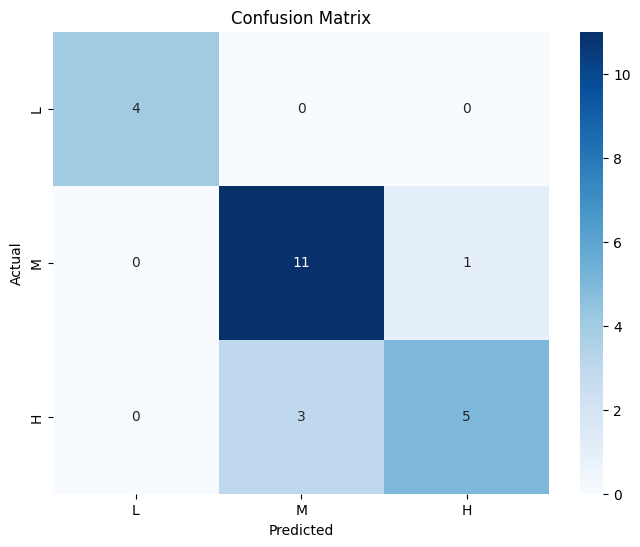

In [137]:
# Generate the classification report
print(classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Imbalanced(?)**

In [138]:
print(new_df3['Class'].value_counts())

Class
M    211
H    142
L    125
Name: count, dtype: int64


In [139]:
df_newimb = pd.concat([
    new_df3[new_df3['Class'] == 'M'].sample(n=170, random_state=42),  # Select 170 random samples from class M
    new_df3[new_df3['Class'] == 'L'],  # Select all samples from class L
    new_df3[new_df3['Class'] == 'H']   # Select all samples from class H
])

# Now df_new contains the selected data
df_newimb

,StudentAbsenceDays,ParentAnsweringSurvey,Relation,AnnouncementsView,raisedhands,VisITedResources,Class,Class_encoded
69,Under-7,No,Father,11,39,40,M,1.0
400,Above-7,No,Father,40,39,71,M,1.0
321,Above-7,Yes,Mum,20,50,80,M,1.0
186,Under-7,Yes,Mum,22,85,15,M,1.0
151,Under-7,Yes,Father,71,23,63,M,1.0
...,...,...,...,...,...,...,...,...
459,Under-7,Yes,Father,80,80,90,H,2.0
464,Under-7,Yes,Mum,42,85,99,H,2.0
465,Under-7,Yes,Mum,45,89,96,H,2.0
466,Under-7,Yes,Mum,64,80,82,H,2.0


In [140]:
print(df_newimb['Class'].value_counts())

Class
M    170
H    142
L    125
Name: count, dtype: int64


In [141]:
df_newimb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 69 to 467
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   StudentAbsenceDays     437 non-null    category
 1   ParentAnsweringSurvey  437 non-null    category
 2   Relation               437 non-null    category
 3   AnnouncementsView      437 non-null    uint8   
 4   raisedhands            437 non-null    uint8   
 5   VisITedResources       437 non-null    uint8   
 6   Class                  437 non-null    object  
 7   Class_encoded          437 non-null    float64 
dtypes: category(3), float64(1), object(1), uint8(3)
memory usage: 13.2+ KB


In [142]:
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(df_newimb.drop(['Class', 'Class_encoded'], axis=1), df_newimb['Class_encoded'], test_size=0.1, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [143]:
print(f"Training data shape: {X_train2.shape}, {y_train2.shape}")
print(f"Validation data shape: {X_val2.shape}, {y_val2.shape}")
print(f"Testing data shape: {X_test2.shape}, {y_test2.shape}")

Training data shape: (393, 6), (393,)
Validation data shape: (24, 6), (24,)
Testing data shape: (24, 6), (24,)


### **Classification with XGBoost (Initial Model)**

In [144]:
# Initialize and train the model
imb_model = XGBClassifier(enable_categorical=True,
                          objective='multi:softmax',
                          num_class=len(encoder.categories_[0])
                         )

In [145]:
imb_model.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [146]:
# Make predictions
y_pred2 = imb_model.predict(X_test2)
print("Predictions:", y_pred2)

Predictions: [2 1 1 0 1 1 2 2 0 0 0 0 2 1 1 2 2 1 1 1 2 1 1 2]


In [147]:
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"Accuracy Score on Test Data: {accuracy2}")

Accuracy Score on Test Data: 0.9583333333333334


### **Classification with XGBoost (Hyperparameter Tuning)**



In [148]:
imb_param_grid1 = {
    'max_depth':range(1,13,1)
}

In [149]:
# Initialize and train the model
imb_model1 = XGBClassifier(enable_categorical=True,
                           objective='multi:softmax',
                           num_class=len(encoder.categories_[0]),
                           seed=42,
                           learning_rate=0.01
                          )

In [150]:
imb_grid_search1 = GridSearchCV(imb_model1, imb_param_grid1, cv=5, scoring='neg_log_loss')

In [151]:
imb_grid_search1.fit(X_train2, y_train2,
                     eval_set=[(X_val2, y_val2)],
                     verbose=3)

[0]	validation_0-mlogloss:1.09319
[3]	validation_0-mlogloss:1.07766
[6]	validation_0-mlogloss:1.06305
[9]	validation_0-mlogloss:1.04861
[12]	validation_0-mlogloss:1.03468
[15]	validation_0-mlogloss:1.02124
[18]	validation_0-mlogloss:1.00825
[21]	validation_0-mlogloss:0.99571
[24]	validation_0-mlogloss:0.98358
[27]	validation_0-mlogloss:0.97186
[30]	validation_0-mlogloss:0.96051
[33]	validation_0-mlogloss:0.94985
[36]	validation_0-mlogloss:0.94027
[39]	validation_0-mlogloss:0.93073
[42]	validation_0-mlogloss:0.92168
[45]	validation_0-mlogloss:0.91319
[48]	validation_0-mlogloss:0.90442
[51]	validation_0-mlogloss:0.89610
[54]	validation_0-mlogloss:0.88830
[57]	validation_0-mlogloss:0.87984
[60]	validation_0-mlogloss:0.87235
[63]	validation_0-mlogloss:0.86408
[66]	validation_0-mlogloss:0.85657
[69]	validation_0-mlogloss:0.84859
[72]	validation_0-mlogloss:0.84145
[75]	validation_0-mlogloss:0.83389
[78]	validation_0-mlogloss:0.82706
[81]	validation_0-mlogloss:0.81980
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'max_depth': range(1, 13)}, scoring='neg_log_loss')

In [152]:
imb_grid_search1.cv_results_, imb_grid_search1.best_params_, imb_grid_search1.best_score_

({'mean_fit_time': array([0.22008715, 0.21468678, 0.27700257, 0.28641276, 0.30472927,
         0.34511724, 0.37031832, 0.40590868, 0.42234988, 0.4473618 ,
         0.45705152, 0.48070278]),
  'std_fit_time': array([0.03330243, 0.02550654, 0.01527856, 0.02746306, 0.01407024,
         0.01084632, 0.01658818, 0.04272092, 0.02083985, 0.02282043,
         0.0297815 , 0.02162523]),
  'mean_score_time': array([0.01224732, 0.01150308, 0.01220436, 0.01200323, 0.01190476,
         0.0119041 , 0.01260381, 0.01240635, 0.01340456, 0.01180234,
         0.01260424, 0.01240544]),
  'std_score_time': array([0.00112529, 0.00077541, 0.00146793, 0.00063256, 0.00066215,
         0.00066259, 0.00049051, 0.00049193, 0.0010199 , 0.0003999 ,
         0.00049115, 0.00049121]),
  'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value=999999),
  

In [153]:
imb_param_grid2 = {
    'min_child_weight':range(1,13,1)
}

In [154]:
# Initialize and train the model
imb_model2 = XGBClassifier(enable_categorical=True,
                       objective='multi:softmax',
                       num_class=len(encoder.categories_[0]),
                       seed=42,
                       learning_rate=0.01,
                       max_depth=7
                      )

In [155]:
imb_grid_search2 = GridSearchCV(imb_model2, imb_param_grid2, cv=5, scoring='neg_log_loss')

In [156]:
imb_grid_search2.fit(X_train2, y_train2,
                     eval_set=[(X_val2, y_val2)],
                     verbose=3)

[0]	validation_0-mlogloss:1.08783
[3]	validation_0-mlogloss:1.05655
[6]	validation_0-mlogloss:1.02661
[9]	validation_0-mlogloss:0.99854
[12]	validation_0-mlogloss:0.97154
[15]	validation_0-mlogloss:0.94567
[18]	validation_0-mlogloss:0.92070
[21]	validation_0-mlogloss:0.89705
[24]	validation_0-mlogloss:0.87415
[27]	validation_0-mlogloss:0.85189
[30]	validation_0-mlogloss:0.83087
[33]	validation_0-mlogloss:0.81089
[36]	validation_0-mlogloss:0.79166
[39]	validation_0-mlogloss:0.77353
[42]	validation_0-mlogloss:0.75599
[45]	validation_0-mlogloss:0.73912
[48]	validation_0-mlogloss:0.72233
[51]	validation_0-mlogloss:0.70635
[54]	validation_0-mlogloss:0.69110
[57]	validation_0-mlogloss:0.67630
[60]	validation_0-mlogloss:0.66201
[63]	validation_0-mlogloss:0.64797
[66]	validation_0-mlogloss:0.63445
[69]	validation_0-mlogloss:0.62134
[72]	validation_0-mlogloss:0.60882
[75]	validation_0-mlogloss:0.59688
[78]	validation_0-mlogloss:0.58542
[81]	validation_0-mlogloss:0.57427
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'min_child_weight': range(1, 13)},
             scoring='neg_log_loss')

In [157]:
imb_grid_search2.cv_results_, grid_search2.best_params_, grid_search2.best_score_

({'mean_fit_time': array([0.54645209, 0.44517665, 0.388764  , 0.37138801, 0.3687603 ,
         0.36196909, 0.34783554, 0.34944072, 0.34512768, 0.31963983,
         0.33666582, 0.32167401]),
  'std_fit_time': array([0.08068543, 0.03664847, 0.01255593, 0.00659767, 0.03618095,
         0.02352786, 0.03403633, 0.03220766, 0.02000002, 0.02779273,
         0.03884519, 0.02796838]),
  'mean_score_time': array([0.01450567, 0.01333432, 0.01320343, 0.01220365, 0.01200299,
         0.01280298, 0.01240315, 0.01227064, 0.01270661, 0.01220322,
         0.01280375, 0.01200538]),
  'std_score_time': array([0.00195058, 0.00098894, 0.00116793, 0.00074853, 0.00126516,
         0.00074837, 0.00102081, 0.00074209, 0.00086819, 0.00074795,
         0.00312323, 0.00155161]),
  'param_min_child_weight': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value=9999

In [158]:
imb_param_grid3 = {
    'gamma': [i/10.0 for i in range(0,5)]
}

In [159]:
# Initialize and train the model
imb_model3 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=7,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01
                      )

In [160]:
imb_grid_search3 = GridSearchCV(imb_model3, imb_param_grid3, cv=5, scoring='neg_log_loss')

In [161]:
imb_grid_search3.fit(X_train2, y_train2,
                     eval_set=[(X_val2, y_val2)],
                     verbose=3)

[0]	validation_0-mlogloss:1.08783
[3]	validation_0-mlogloss:1.05655
[6]	validation_0-mlogloss:1.02661
[9]	validation_0-mlogloss:0.99854
[12]	validation_0-mlogloss:0.97154
[15]	validation_0-mlogloss:0.94567
[18]	validation_0-mlogloss:0.92070
[21]	validation_0-mlogloss:0.89705
[24]	validation_0-mlogloss:0.87415
[27]	validation_0-mlogloss:0.85189
[30]	validation_0-mlogloss:0.83087
[33]	validation_0-mlogloss:0.81089
[36]	validation_0-mlogloss:0.79166
[39]	validation_0-mlogloss:0.77353
[42]	validation_0-mlogloss:0.75599
[45]	validation_0-mlogloss:0.73912
[48]	validation_0-mlogloss:0.72233
[51]	validation_0-mlogloss:0.70635
[54]	validation_0-mlogloss:0.69110
[57]	validation_0-mlogloss:0.67630
[60]	validation_0-mlogloss:0.66201
[63]	validation_0-mlogloss:0.64797
[66]	validation_0-mlogloss:0.63445
[69]	validation_0-mlogloss:0.62134
[72]	validation_0-mlogloss:0.60882
[75]	validation_0-mlogloss:0.59688
[78]	validation_0-mlogloss:0.58542
[81]	validation_0-mlogloss:0.57427
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='neg_log_loss')

In [162]:
imb_grid_search3.cv_results_, imb_grid_search3.best_params_, imb_grid_search3.best_score_

({'mean_fit_time': array([0.59507847, 0.48687701, 0.4215508 , 0.40837531, 0.40532231]),
  'std_fit_time': array([0.11195303, 0.0455511 , 0.03016814, 0.01186724, 0.01991688]),
  'mean_score_time': array([0.01691165, 0.01646295, 0.01280279, 0.0125051 , 0.01250463]),
  'std_score_time': array([0.00406602, 0.0050394 , 0.00074793, 0.00063555, 0.00044774]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([-0.82965397, -0.82974496, -0.82942961, -0.8300845 , -0.8284589 ]),
  'split1_test_score': array([-0.78798039, -0.78831063, -0.79129383, -0.78741268, -0.78591541]),
  'split2_test_score': array([-0.73335966, -0.73231165, -0.73350925, -0.73719335, -0.74038299]),
  'split3_test_score': array([-0.7425111 , -0.74390435, -0.73799922, -0.73993687, -0.73963309]),
  'sp

In [163]:
imb_param_grid4 = {
    'subsample':[i/10.0 for i in range(6,10)]
}

In [164]:
# Initialize and train the model
imb_model4 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=7,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01,
                      gamma=0.3
                      )

In [165]:
imb_grid_search4 = GridSearchCV(imb_model4, imb_param_grid4, cv=5, scoring='neg_log_loss')

In [166]:
imb_grid_search4.fit(X_train2, y_train2,
                     eval_set=[(X_val2, y_val2)],
                     verbose=3)

[0]	validation_0-mlogloss:1.08856
[3]	validation_0-mlogloss:1.06129
[6]	validation_0-mlogloss:1.03626
[9]	validation_0-mlogloss:1.00999
[12]	validation_0-mlogloss:0.98605
[15]	validation_0-mlogloss:0.96237
[18]	validation_0-mlogloss:0.93994
[21]	validation_0-mlogloss:0.91766
[24]	validation_0-mlogloss:0.89672
[27]	validation_0-mlogloss:0.87733
[30]	validation_0-mlogloss:0.85879
[33]	validation_0-mlogloss:0.83962
[36]	validation_0-mlogloss:0.82000
[39]	validation_0-mlogloss:0.80253
[42]	validation_0-mlogloss:0.78525
[45]	validation_0-mlogloss:0.76841
[48]	validation_0-mlogloss:0.75316
[51]	validation_0-mlogloss:0.73770
[54]	validation_0-mlogloss:0.72215
[57]	validation_0-mlogloss:0.70832
[60]	validation_0-mlogloss:0.69550
[63]	validation_0-mlogloss:0.68224
[66]	validation_0-mlogloss:0.67032
[69]	validation_0-mlogloss:0.65766
[72]	validation_0-mlogloss:0.64455
[75]	validation_0-mlogloss:0.63183
[78]	validation_0-mlogloss:0.61986
[81]	validation_0-mlogloss:0.60907
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=0.3,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='neg_log_loss')

In [167]:
imb_grid_search4.cv_results_, imb_grid_search4.best_params_, imb_grid_search4.best_score_

({'mean_fit_time': array([0.51135106, 0.42035923, 0.40839148, 0.40107431]),
  'std_fit_time': array([0.07270338, 0.01827634, 0.03134866, 0.00950463]),
  'mean_score_time': array([0.01544557, 0.01320872, 0.01364522, 0.01348557]),
  'std_score_time': array([0.0043238 , 0.00092969, 0.00087514, 0.00115367]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.8, 0.9],
               mask=[False, False, False, False],
         fill_value=1e+20),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.8},
   {'subsample': 0.9}],
  'split0_test_score': array([-0.82696633, -0.82644443, -0.8259487 , -0.82736482]),
  'split1_test_score': array([-0.76716426, -0.76583319, -0.76280664, -0.76582966]),
  'split2_test_score': array([-0.72401906, -0.71722345, -0.71482916, -0.72333829]),
  'split3_test_score': array([-0.76469192, -0.75707159, -0.7491685 , -0.74350005]),
  'split4_test_score': array([-0.76188611, -0.76572222, -0.76497339, -0.77272043]),
  'mean_test_score': array([-0.7

In [168]:
imb_param_grid5 = {
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [169]:
# Initialize and train the model
imb_model5 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=7,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01,
                      gamma=0.3,
                      subsample=0.8
                      )

In [170]:
imb_grid_search5 = GridSearchCV(imb_model5, imb_param_grid5, cv=5, scoring='neg_log_loss')

In [171]:
imb_grid_search5.fit(X_train2, y_train2,
                     eval_set=[(X_val2, y_val2)],
                     verbose=3)

[0]	validation_0-mlogloss:1.09073
[3]	validation_0-mlogloss:1.06731
[6]	validation_0-mlogloss:1.04570
[9]	validation_0-mlogloss:1.02505
[12]	validation_0-mlogloss:1.00442
[15]	validation_0-mlogloss:0.98316
[18]	validation_0-mlogloss:0.96654
[21]	validation_0-mlogloss:0.94729
[24]	validation_0-mlogloss:0.92926
[27]	validation_0-mlogloss:0.91058
[30]	validation_0-mlogloss:0.89430
[33]	validation_0-mlogloss:0.87544
[36]	validation_0-mlogloss:0.85884
[39]	validation_0-mlogloss:0.84162
[42]	validation_0-mlogloss:0.82563
[45]	validation_0-mlogloss:0.81104
[48]	validation_0-mlogloss:0.79659
[51]	validation_0-mlogloss:0.78171
[54]	validation_0-mlogloss:0.76790
[57]	validation_0-mlogloss:0.75524
[60]	validation_0-mlogloss:0.73992
[63]	validation_0-mlogloss:0.72703
[66]	validation_0-mlogloss:0.71521
[69]	validation_0-mlogloss:0.70422
[72]	validation_0-mlogloss:0.69234
[75]	validation_0-mlogloss:0.68128
[78]	validation_0-mlogloss:0.67068
[81]	validation_0-mlogloss:0.65961
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=0.3,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
             scoring='neg_log_loss')

In [172]:
imb_grid_search5.cv_results_, imb_grid_search5.best_params_, imb_grid_search5.best_score_

({'mean_fit_time': array([0.48141637, 0.40208473, 0.43402052, 0.39106383]),
  'std_fit_time': array([0.09460839, 0.02346351, 0.03739688, 0.01657727]),
  'mean_score_time': array([0.01407256, 0.01409025, 0.01360331, 0.01330938]),
  'std_score_time': array([0.00188113, 0.00142594, 0.00101987, 0.00087785]),
  'param_colsample_bytree': masked_array(data=[0.6, 0.7, 0.8, 0.9],
               mask=[False, False, False, False],
         fill_value=1e+20),
  'params': [{'colsample_bytree': 0.6},
   {'colsample_bytree': 0.7},
   {'colsample_bytree': 0.8},
   {'colsample_bytree': 0.9}],
  'split0_test_score': array([-0.83578638, -0.82818095, -0.82818095, -0.82670758]),
  'split1_test_score': array([-0.80066655, -0.77627337, -0.77627337, -0.76972843]),
  'split2_test_score': array([-0.75369683, -0.73417535, -0.73417535, -0.72074707]),
  'split3_test_score': array([-0.78183884, -0.76950606, -0.76950606, -0.757943  ]),
  'split4_test_score': array([-0.77723006, -0.76780081, -0.76780081, -0.76606299]

In [173]:
imb_param_grid6 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

In [174]:
# Initialize and train the model
imb_model6 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=7,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01,
                      gamma=0.3,
                      subsample=0.8,
                      colsample_bytree=0.9
                      )

In [175]:
imb_grid_search6 = GridSearchCV(imb_model6, imb_param_grid6, cv=5, scoring='neg_log_loss')

In [176]:
imb_grid_search6.fit(X_train2, y_train2,
                     eval_set=[(X_val2, y_val2)],
                     verbose=3)

[0]	validation_0-mlogloss:1.09015
[3]	validation_0-mlogloss:1.06254
[6]	validation_0-mlogloss:1.03510
[9]	validation_0-mlogloss:1.00889
[12]	validation_0-mlogloss:0.98317
[15]	validation_0-mlogloss:0.95943
[18]	validation_0-mlogloss:0.93674
[21]	validation_0-mlogloss:0.91455
[24]	validation_0-mlogloss:0.89318
[27]	validation_0-mlogloss:0.87321
[30]	validation_0-mlogloss:0.85428
[33]	validation_0-mlogloss:0.83523
[36]	validation_0-mlogloss:0.81763
[39]	validation_0-mlogloss:0.79931
[42]	validation_0-mlogloss:0.78280
[45]	validation_0-mlogloss:0.76621
[48]	validation_0-mlogloss:0.75097
[51]	validation_0-mlogloss:0.73509
[54]	validation_0-mlogloss:0.72021
[57]	validation_0-mlogloss:0.70569
[60]	validation_0-mlogloss:0.69052
[63]	validation_0-mlogloss:0.67681
[66]	validation_0-mlogloss:0.66391
[69]	validation_0-mlogloss:0.65165
[72]	validation_0-mlogloss:0.63893
[75]	validation_0-mlogloss:0.62746
[78]	validation_0-mlogloss:0.61557
[81]	validation_0-mlogloss:0.60442
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=0.3,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='neg_log_loss')

In [177]:
imb_grid_search6.cv_results_, imb_grid_search6.best_params_, imb_grid_search6.best_score_

({'mean_fit_time': array([0.5612762 , 0.43163967, 0.41335483, 0.35966902, 0.20477648]),
  'std_fit_time': array([0.10920938, 0.01702701, 0.02822642, 0.01072175, 0.02907617]),
  'mean_score_time': array([0.01570749, 0.01393919, 0.01290617, 0.0127039 , 0.01240554]),
  'std_score_time': array([0.00178359, 0.00117915, 0.00049303, 0.00098106, 0.00120258]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1.0, 100.0],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([-0.82670766, -0.82679363, -0.82828818, -0.84505151, -1.09861226]),
  'split1_test_score': array([-0.76972855, -0.76947324, -0.77150694, -0.78609129, -1.09861226]),
  'split2_test_score': array([-0.72074729, -0.72129714, -0.72399667, -0.75249852, -1.09861226]),
  'split3_test_score': array([-0.75794316, -0.75765012, -0.75717558, -0.

In [178]:
imb_param_grid7 = {
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100]
}

In [179]:
# Initialize and train the model
imb_model7 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=7,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01,
                      gamma=0.3,
                      subsample=0.8,
                      colsample_bytree=0.9,
                      reg_alpha=1e-05
                      )

In [180]:
imb_grid_search7 = GridSearchCV(imb_model7, imb_param_grid7, cv=5, scoring='neg_log_loss')

In [181]:
imb_grid_search7.fit(X_train2, y_train2,
                     eval_set=[(X_val2, y_val2)],
                     verbose=3)

[0]	validation_0-mlogloss:1.08932
[3]	validation_0-mlogloss:1.05746
[6]	validation_0-mlogloss:1.02690
[9]	validation_0-mlogloss:0.99724
[12]	validation_0-mlogloss:0.96976
[15]	validation_0-mlogloss:0.94374
[18]	validation_0-mlogloss:0.91747
[21]	validation_0-mlogloss:0.89332
[24]	validation_0-mlogloss:0.86879
[27]	validation_0-mlogloss:0.84787
[30]	validation_0-mlogloss:0.82711
[33]	validation_0-mlogloss:0.80560
[36]	validation_0-mlogloss:0.78601
[39]	validation_0-mlogloss:0.76558
[42]	validation_0-mlogloss:0.74737
[45]	validation_0-mlogloss:0.72867
[48]	validation_0-mlogloss:0.71327
[51]	validation_0-mlogloss:0.69646
[54]	validation_0-mlogloss:0.68078
[57]	validation_0-mlogloss:0.66559
[60]	validation_0-mlogloss:0.65043
[63]	validation_0-mlogloss:0.63650
[66]	validation_0-mlogloss:0.62320
[69]	validation_0-mlogloss:0.61090
[72]	validation_0-mlogloss:0.59771
[75]	validation_0-mlogloss:0.58531
[78]	validation_0-mlogloss:0.57229
[81]	validation_0-mlogloss:0.56154
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=0.3,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'reg_lambda': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='neg_log_loss')

In [182]:
imb_grid_search7.cv_results_, imb_grid_search7.best_params_, imb_grid_search7.best_score_

({'mean_fit_time': array([0.51681676, 0.4766046 , 0.4234386 , 0.42072973, 0.29279733]),
  'std_fit_time': array([0.08792843, 0.05097713, 0.01508325, 0.00999377, 0.02795473]),
  'mean_score_time': array([0.01480584, 0.01360292, 0.01300344, 0.01430697, 0.01200285]),
  'std_score_time': array([0.0011655 , 0.00049004, 0.00109689, 0.00198531, 0.00063362]),
  'param_reg_lambda': masked_array(data=[1e-05, 0.01, 0.1, 1.0, 100.0],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'reg_lambda': 1e-05},
   {'reg_lambda': 0.01},
   {'reg_lambda': 0.1},
   {'reg_lambda': 1},
   {'reg_lambda': 100}],
  'split0_test_score': array([-0.81793007, -0.81861304, -0.81923139, -0.82670766, -0.98928828]),
  'split1_test_score': array([-0.75959405, -0.76048997, -0.76047525, -0.76972855, -0.96508755]),
  'split2_test_score': array([-0.70057659, -0.70151442, -0.70388447, -0.72074729, -0.96912417]),
  'split3_test_score': array([-0.74665556, -0.74733086, -0.7494531

In [183]:
imb_param_grid8 = {
    'n_estimators':range(100,1200,100)
}

In [184]:
# Initialize and train the model
imb_model8 = XGBClassifier(enable_categorical=True,
                      objective='multi:softmax',
                      num_class=len(encoder.categories_[0]),
                      max_depth=7,
                      min_child_weight=1,
                      seed=42,
                      learning_rate=0.01,
                      gamma=0.3,
                      subsample=0.8,
                      colsample_bytree=0.9,
                      reg_alpha=1e-05,
                      reg_lambda=1e-05
                      )

In [185]:
imb_grid_search8 = GridSearchCV(imb_model8, imb_param_grid8, cv=5, scoring='neg_log_loss')

In [186]:
imb_grid_search8.fit(X_train2, y_train2,
                     eval_set=[(X_val2, y_val2)],
                     verbose=3)

[0]	validation_0-mlogloss:1.08932
[3]	validation_0-mlogloss:1.05746
[6]	validation_0-mlogloss:1.02690
[9]	validation_0-mlogloss:0.99724
[12]	validation_0-mlogloss:0.96976
[15]	validation_0-mlogloss:0.94374
[18]	validation_0-mlogloss:0.91747
[21]	validation_0-mlogloss:0.89332
[24]	validation_0-mlogloss:0.86879
[27]	validation_0-mlogloss:0.84787
[30]	validation_0-mlogloss:0.82711
[33]	validation_0-mlogloss:0.80560
[36]	validation_0-mlogloss:0.78601
[39]	validation_0-mlogloss:0.76558
[42]	validation_0-mlogloss:0.74737
[45]	validation_0-mlogloss:0.72867
[48]	validation_0-mlogloss:0.71327
[51]	validation_0-mlogloss:0.69646
[54]	validation_0-mlogloss:0.68078
[57]	validation_0-mlogloss:0.66559
[60]	validation_0-mlogloss:0.65043
[63]	validation_0-mlogloss:0.63650
[66]	validation_0-mlogloss:0.62320
[69]	validation_0-mlogloss:0.61090
[72]	validation_0-mlogloss:0.59771
[75]	validation_0-mlogloss:0.58531
[78]	validation_0-mlogloss:0.57229
[81]	validation_0-mlogloss:0.56154
[84]	validation_0-mloglo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=0.3,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'n_estimators': range(100, 1200, 100)},
             scoring='neg_log_loss')

In [187]:
imb_grid_search8.cv_results_, imb_grid_search8.best_params_, imb_grid_search8.best_score_

({'mean_fit_time': array([0.52206836, 0.91304779, 1.15893073, 1.51249781, 1.80156093,
         2.10503836, 2.59755921, 3.0385222 , 3.41836305, 3.90234795,
         4.35265651]),
  'std_fit_time': array([0.08844364, 0.01191349, 0.08723824, 0.08575409, 0.06905339,
         0.23878884, 0.03098582, 0.05042721, 0.05887815, 0.04977099,
         0.14633312]),
  'mean_score_time': array([0.013202  , 0.01486068, 0.01840811, 0.01850839, 0.01897583,
         0.02050667, 0.02060556, 0.02066445, 0.02100544, 0.02200789,
         0.02200546]),
  'std_score_time': array([0.00097941, 0.00113261, 0.0013971 , 0.00134308, 0.00071017,
         0.00063049, 0.00079954, 0.00038547, 0.00063241, 0.00055087,
         0.00089548]),
  'param_n_estimators': masked_array(data=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,
                     1100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
         fill_value=999999),
  'params': [{'

In [188]:
# Make predictions
best_model2 = imb_grid_search8.best_estimator_
y_pred2 = best_model2.predict(X_test2)
print("Predictions:", y_pred2)

Predictions: [2 1 1 0 1 1 2 2 0 0 0 0 2 1 1 2 2 1 1 1 2 1 1 2]


In [189]:
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"Accuracy Score on Test Data: {accuracy2}")

Accuracy Score on Test Data: 0.9583333333333334


### **Evaluation**

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       1.00      0.92      0.96        12
         2.0       1.00      1.00      1.00         8

    accuracy                           0.96        24
   macro avg       0.93      0.97      0.95        24
weighted avg       0.97      0.96      0.96        24



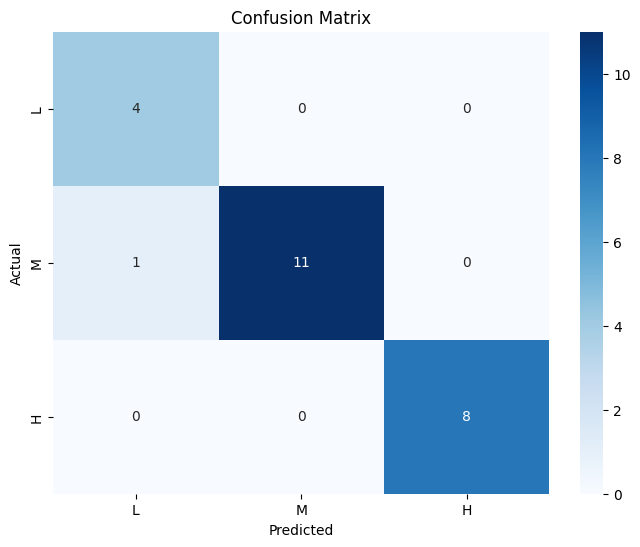

In [190]:
# Generate the classification report
print(classification_report(y_test2, y_pred2))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()